In [64]:
import scanpy as sc
import drug2cell as d2c
import blitzgsea as blitz

sc.settings.set_figure_params(dpi=80)

# Vascular subset

adata = sc.read_h5ad('/home/mhassan/R_Projects/scAtlas/Analysis/Vascular/Objects/Vascular_IntegratedObj_label_transferred_from_SubECs_updated_names.h5ad')
adata

# Rename specific cell types
adata.obs['Vascular_labels'] = adata.obs['Vascular_labels'].replace({
    'Arterial Endothelial cells': 'Art',
    'Lymphatic Endothelial cells': 'LECs',
    'Venous Endothelial cells 1': 'V1',
    'Venous Endothelial cells 2': 'V2',
    'Venous Endothelial cells 3': 'V3',
    'Capillary Endothelial cells 1': 'C1',
    'Capillary Endothelial cells 2': 'C2',
    'SubEndothelial cells': 'SubECs'
})

/tmp/ipykernel_1783117/2017567055.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Vascular_labels'] = adata.obs['Vascular_labels'].replace({


# V1

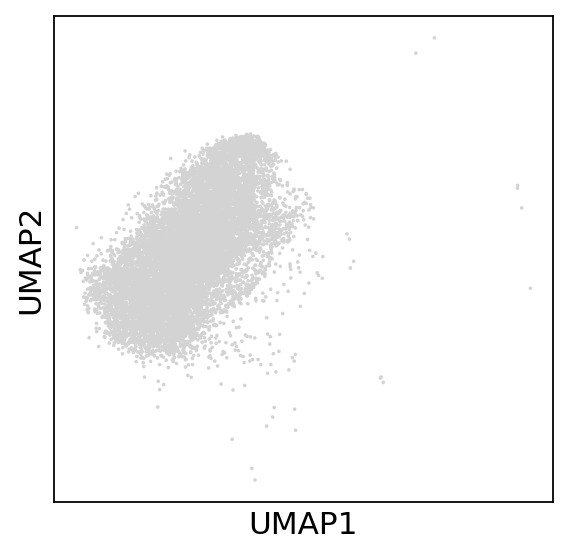

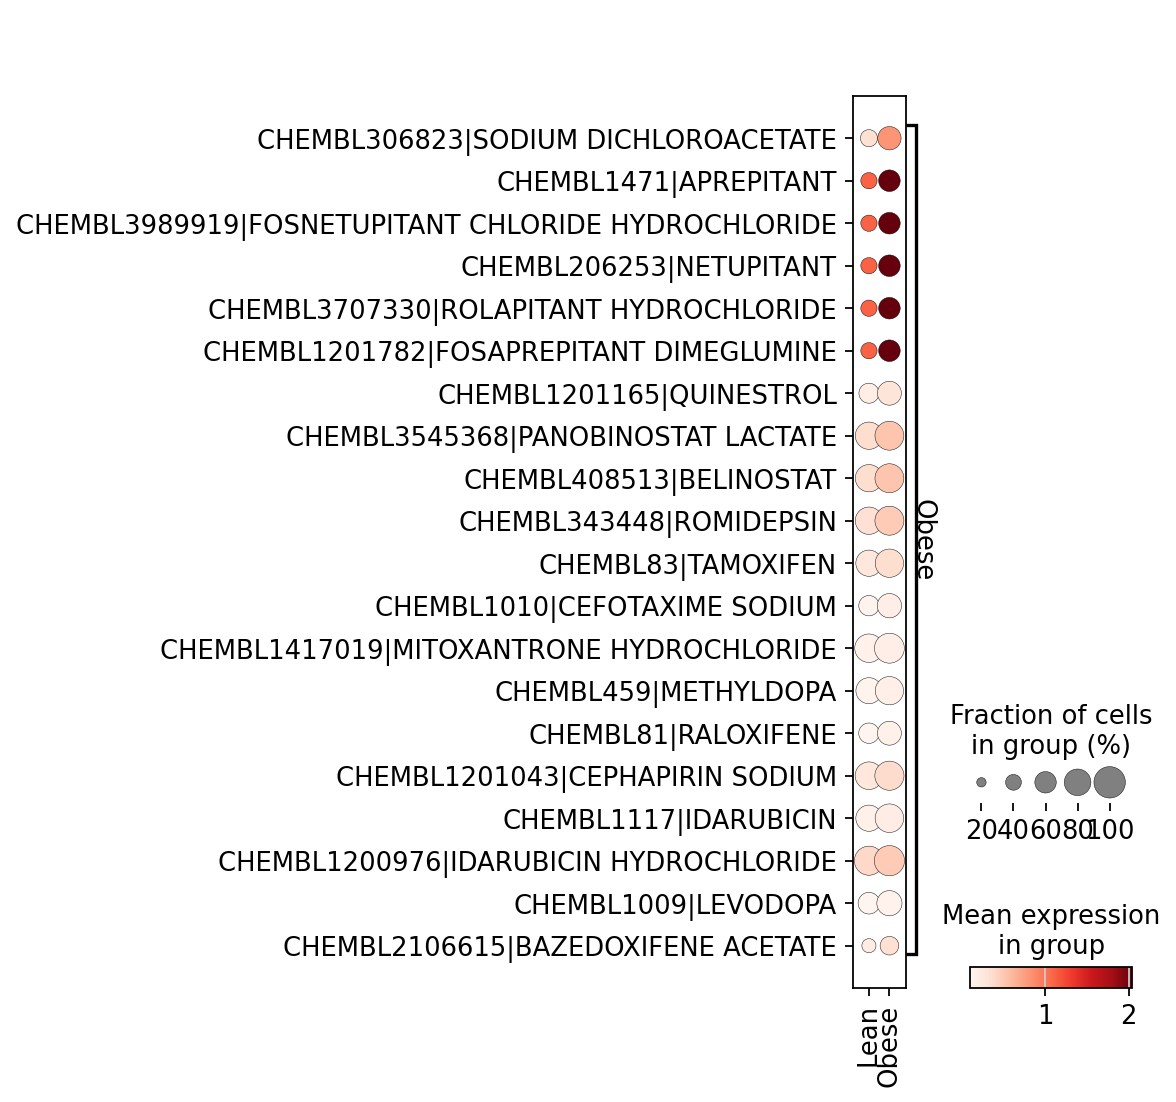

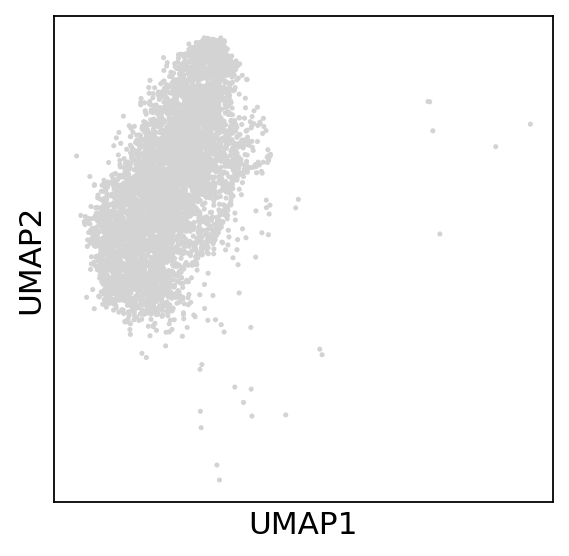

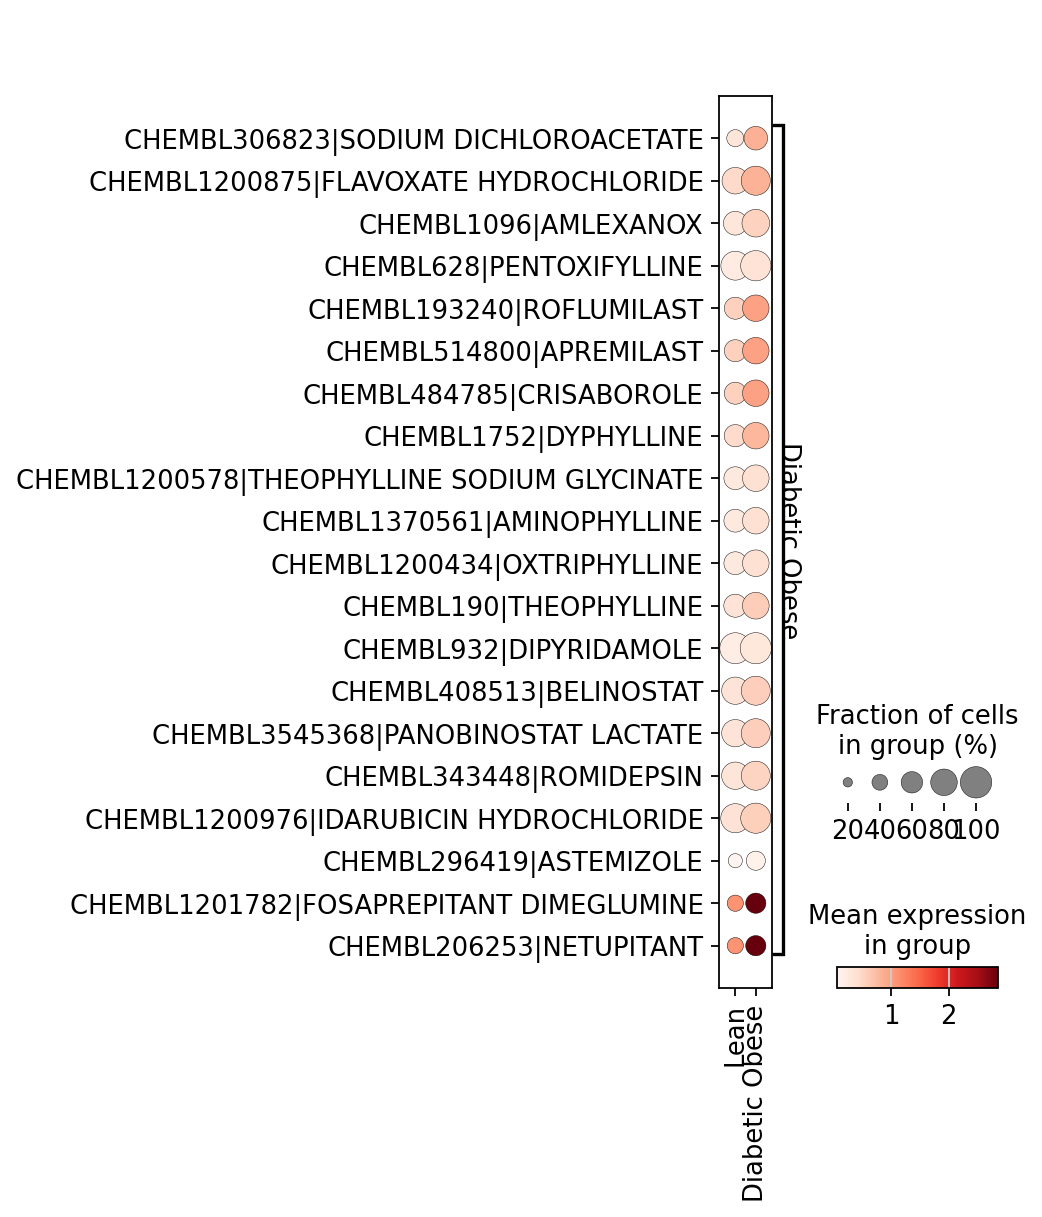

In [31]:
adataV1 = adata[adata.obs['Vascular_labels'] == 'V1'].copy()
adataV1

adataV1_noDiab = adataV1[adataV1.obs['Condition'] != "Diabetic Obese"].copy()
adataV1_noDiab

adataV1_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV1_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataV1_noDiab

sc.pl.umap(adataV1_noDiab.uns['drug2cell'])

adataV1_noDiab

sc.tl.rank_genes_groups(adataV1_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataV1_noDiab

sc.pl.rank_genes_groups_dotplot(adataV1_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV1_adataV1_noDiab = adataV1_noDiab.uns['drug2cell']
drug2cellV1_adataV1_noDiab

drug2cellV1_adataV1_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV1_adataV1_noDiab.uns['rank_genes_groups']

dfV1 = drug2cellV1_adataV1_noDiab.uns['rank_genes_groups']

type(dfV1)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V1_Lean_vs_Obese.xlsx')


adataV1_noObese = adataV1[adataV1.obs['Condition'] != "Obese"].copy()
adataV1_noObese

adataV1_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV1_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataV1_noObese

sc.pl.umap(adataV1_noObese.uns['drug2cell'])

adataV1_noObese

sc.tl.rank_genes_groups(adataV1_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataV1_noObese

sc.pl.rank_genes_groups_dotplot(adataV1_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV1_adataV1_noObese = adataV1_noObese.uns['drug2cell']
drug2cellV1_adataV1_noObese

drug2cellV1_adataV1_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV1_adataV1_noObese.uns['rank_genes_groups']

dfV1 = drug2cellV1_adataV1_noObese.uns['rank_genes_groups']

type(dfV1)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V1_Lean_vs_D_Obese.xlsx')


# V2

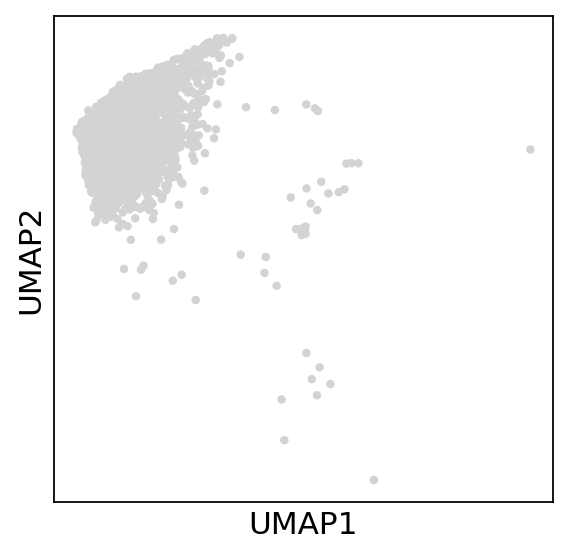

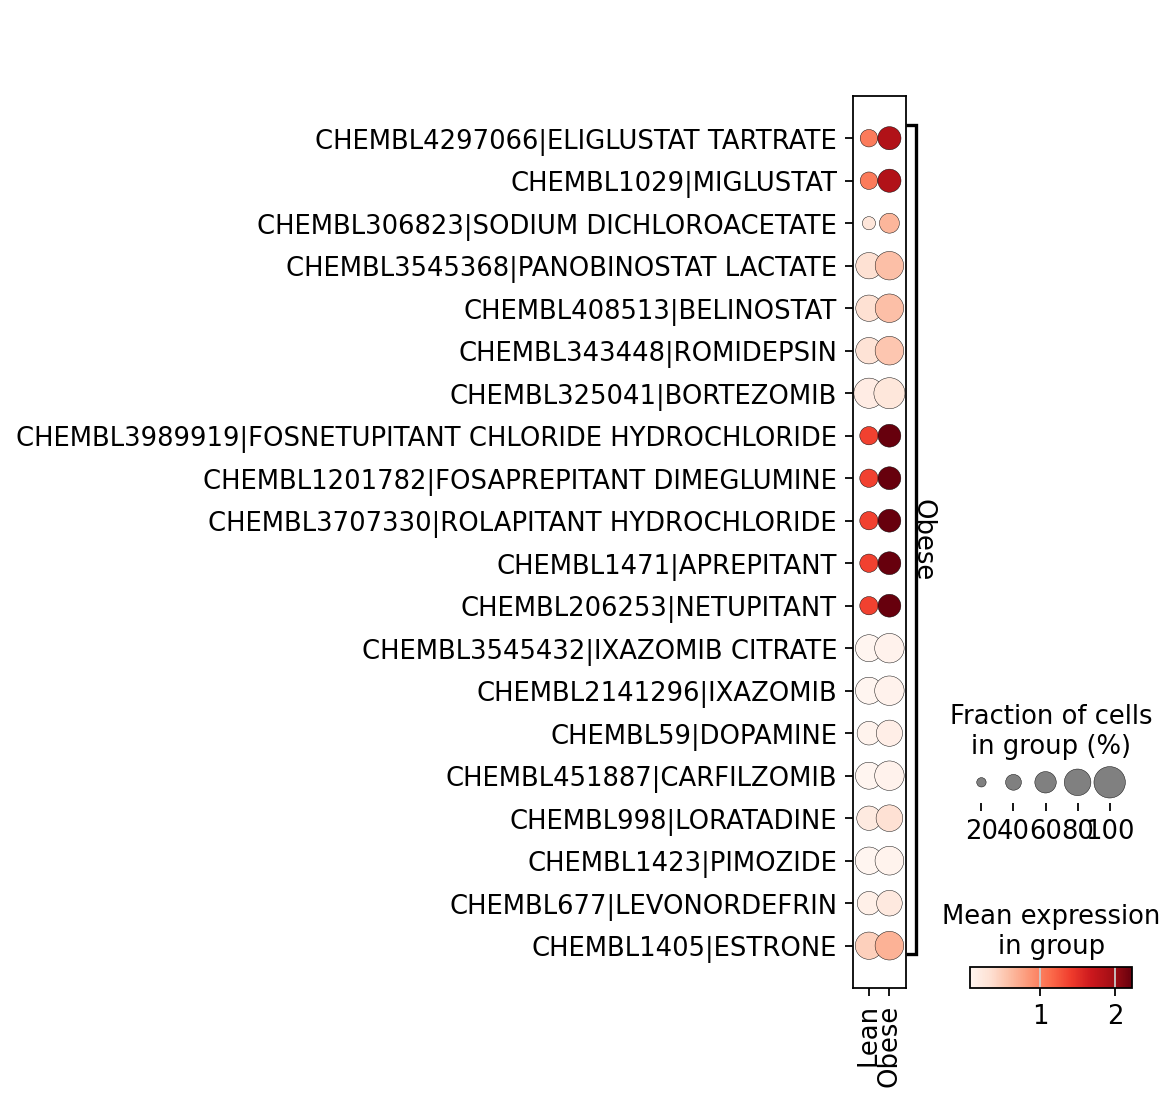

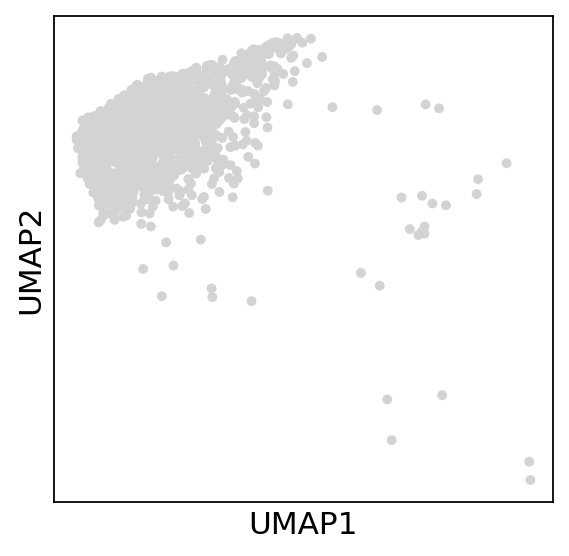

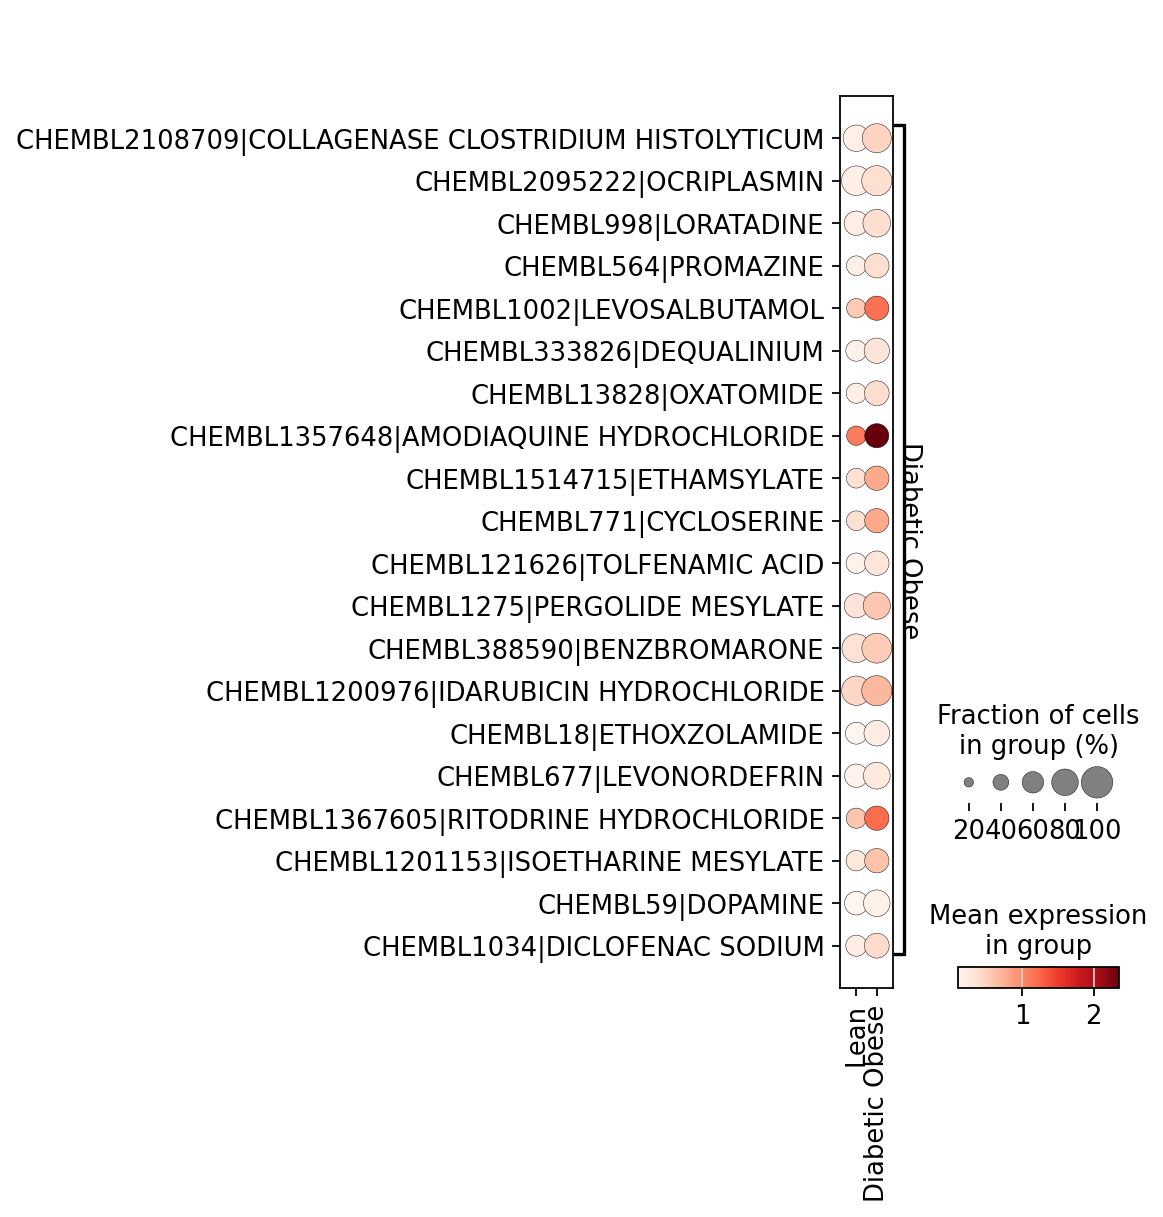

In [32]:
adataV2 = adata[adata.obs['Vascular_labels'] == 'V2'].copy()
adataV2

adataV2_noDiab = adataV2[adataV2.obs['Condition'] != "Diabetic Obese"].copy()
adataV2_noDiab

adataV2_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV2_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataV2_noDiab

sc.pl.umap(adataV2_noDiab.uns['drug2cell'])

adataV2_noDiab

sc.tl.rank_genes_groups(adataV2_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataV2_noDiab

sc.pl.rank_genes_groups_dotplot(adataV2_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV2_adataV2_noDiab = adataV2_noDiab.uns['drug2cell']
drug2cellV2_adataV2_noDiab

drug2cellV2_adataV2_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV2_adataV2_noDiab.uns['rank_genes_groups']

dfV2 = drug2cellV2_adataV2_noDiab.uns['rank_genes_groups']

type(dfV2)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V2_Lean_vs_Obese.xlsx')


adataV2_noObese = adataV2[adataV2.obs['Condition'] != "Obese"].copy()
adataV2_noObese

adataV2_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV2_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataV2_noObese

sc.pl.umap(adataV2_noObese.uns['drug2cell'])

adataV2_noObese

sc.tl.rank_genes_groups(adataV2_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataV2_noObese

sc.pl.rank_genes_groups_dotplot(adataV2_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV2_adataV2_noObese = adataV2_noObese.uns['drug2cell']
drug2cellV2_adataV2_noObese

drug2cellV2_adataV2_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV2_adataV2_noObese.uns['rank_genes_groups']

dfV2 = drug2cellV2_adataV2_noObese.uns['rank_genes_groups']

type(dfV2)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V2_Lean_vs_D_Obese.xlsx')


# V3

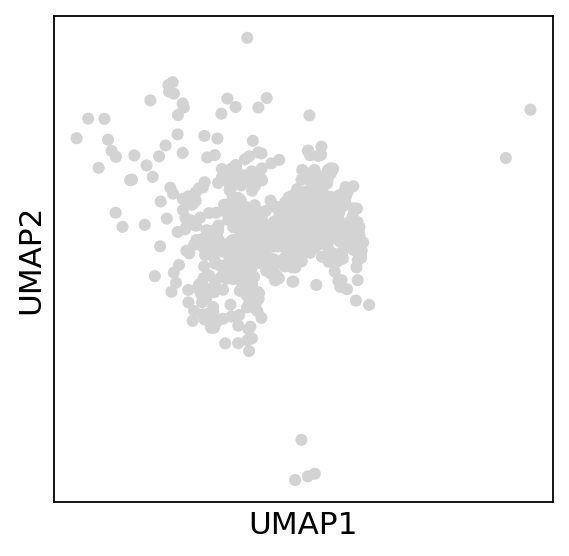

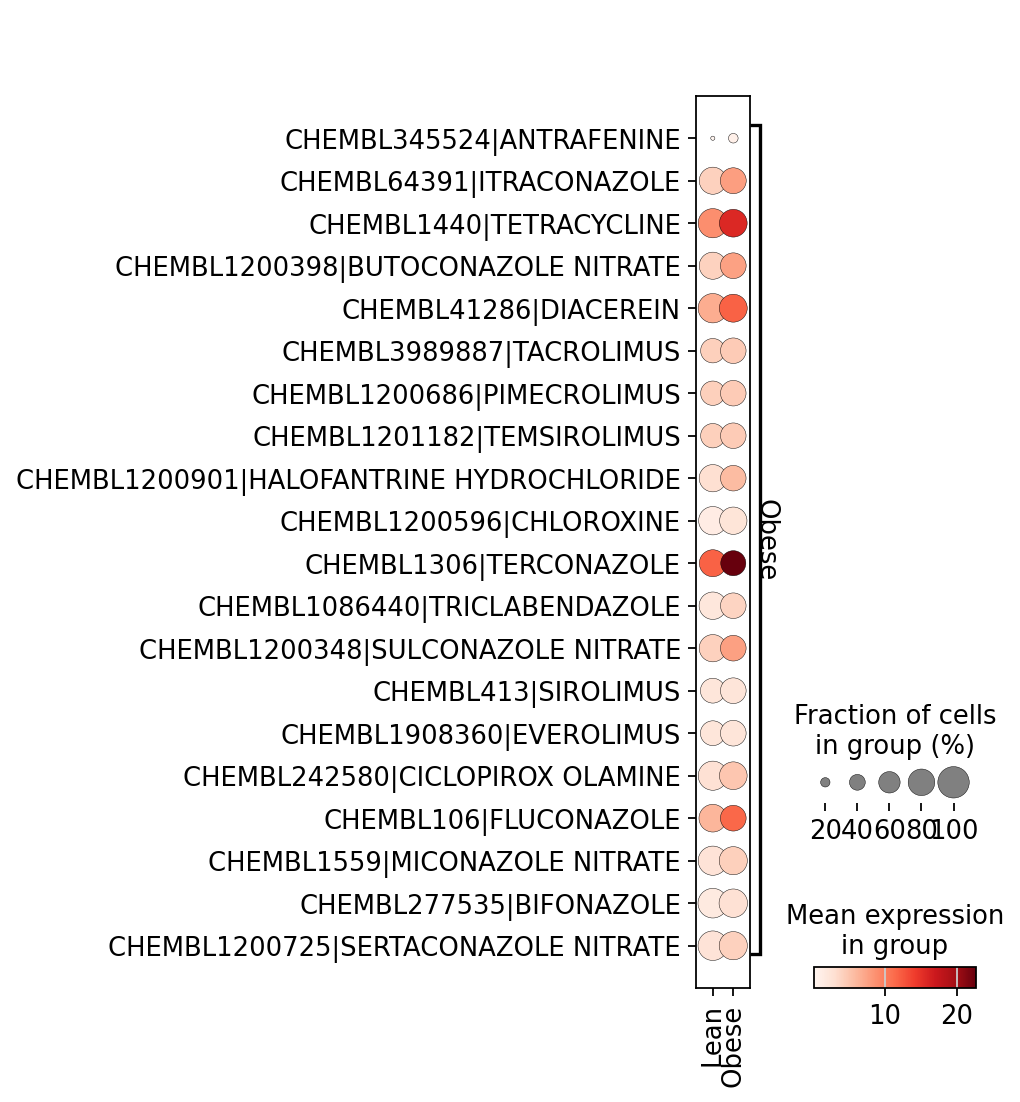

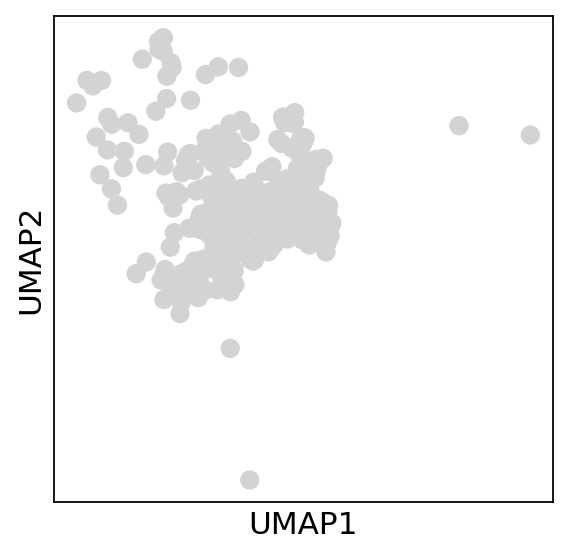

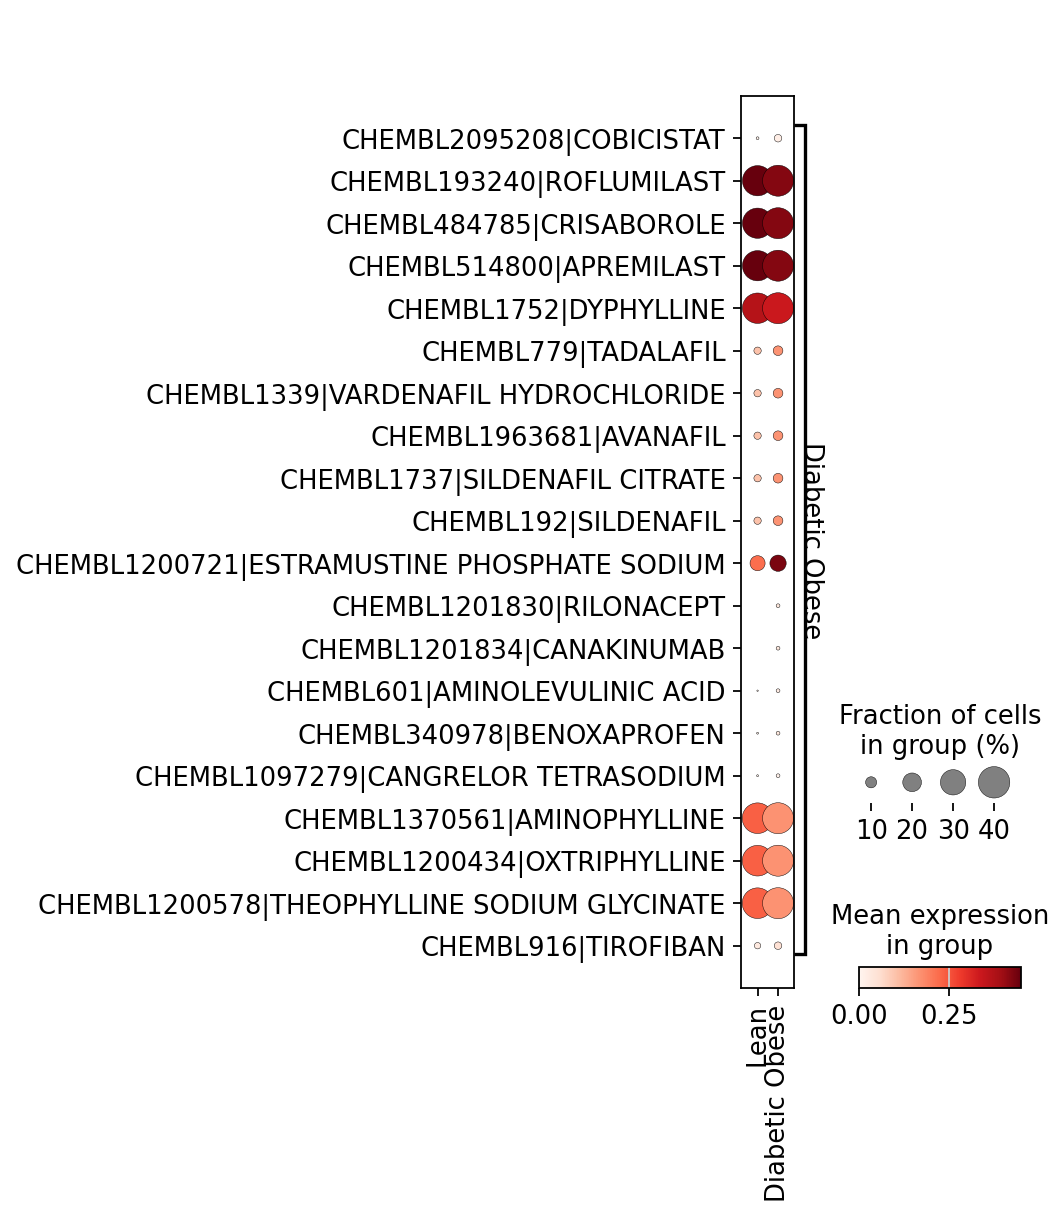

In [33]:
adataV3 = adata[adata.obs['Vascular_labels'] == 'V3'].copy()
adataV3

adataV3_noDiab = adataV3[adataV3.obs['Condition'] != "Diabetic Obese"].copy()
adataV3_noDiab

adataV3_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV3_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataV3_noDiab

sc.pl.umap(adataV3_noDiab.uns['drug2cell'])

adataV3_noDiab

sc.tl.rank_genes_groups(adataV3_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataV3_noDiab

sc.pl.rank_genes_groups_dotplot(adataV3_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV3_adataV3_noDiab = adataV3_noDiab.uns['drug2cell']
drug2cellV3_adataV3_noDiab

drug2cellV3_adataV3_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV3_adataV3_noDiab.uns['rank_genes_groups']

dfV3 = drug2cellV3_adataV3_noDiab.uns['rank_genes_groups']

type(dfV3)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V3_Lean_vs_Obese.xlsx')


adataV3_noObese = adataV3[adataV3.obs['Condition'] != "Obese"].copy()
adataV3_noObese

adataV3_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataV3_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataV3_noObese

sc.pl.umap(adataV3_noObese.uns['drug2cell'])

adataV3_noObese

sc.tl.rank_genes_groups(adataV3_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataV3_noObese

sc.pl.rank_genes_groups_dotplot(adataV3_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellV3_adataV3_noObese = adataV3_noObese.uns['drug2cell']
drug2cellV3_adataV3_noObese

drug2cellV3_adataV3_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellV3_adataV3_noObese.uns['rank_genes_groups']

dfV3 = drug2cellV3_adataV3_noObese.uns['rank_genes_groups']

type(dfV3)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_V3_Lean_vs_D_Obese.xlsx')


# C1

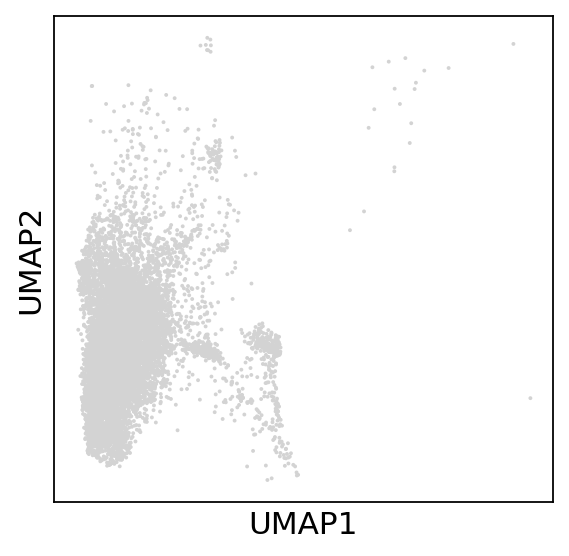

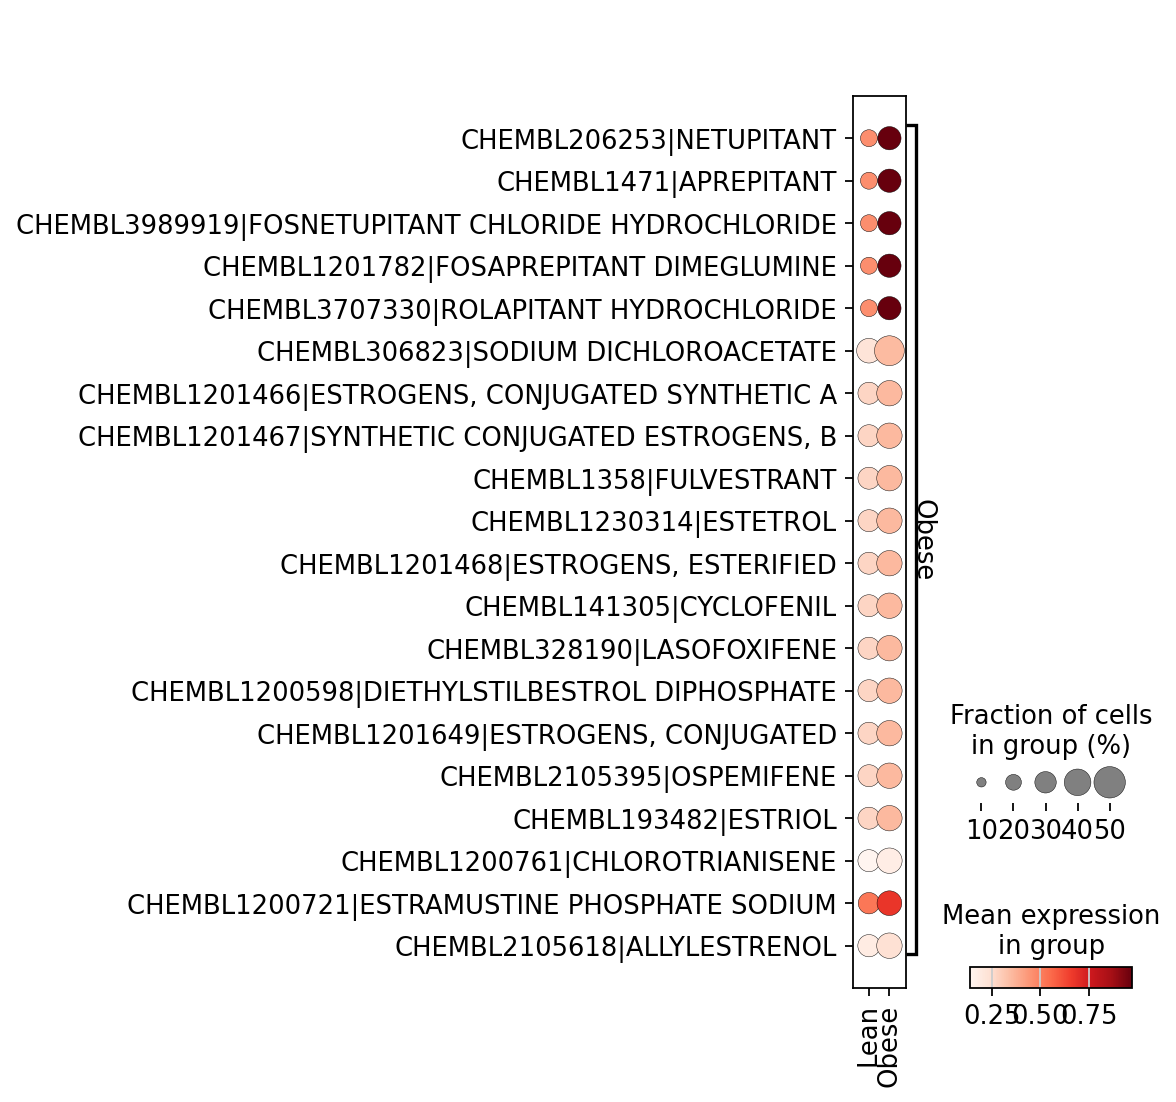

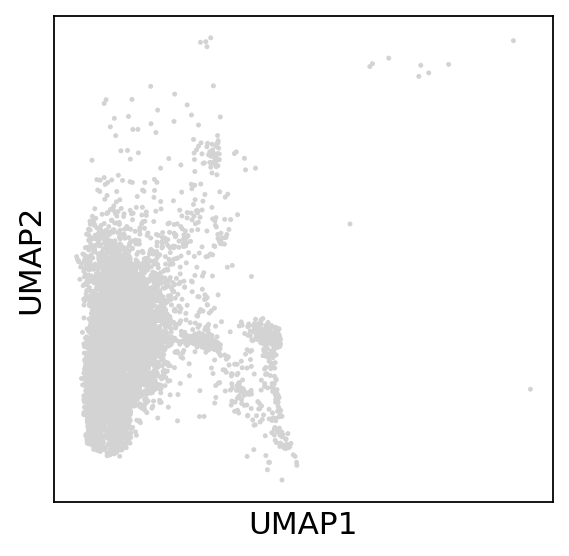

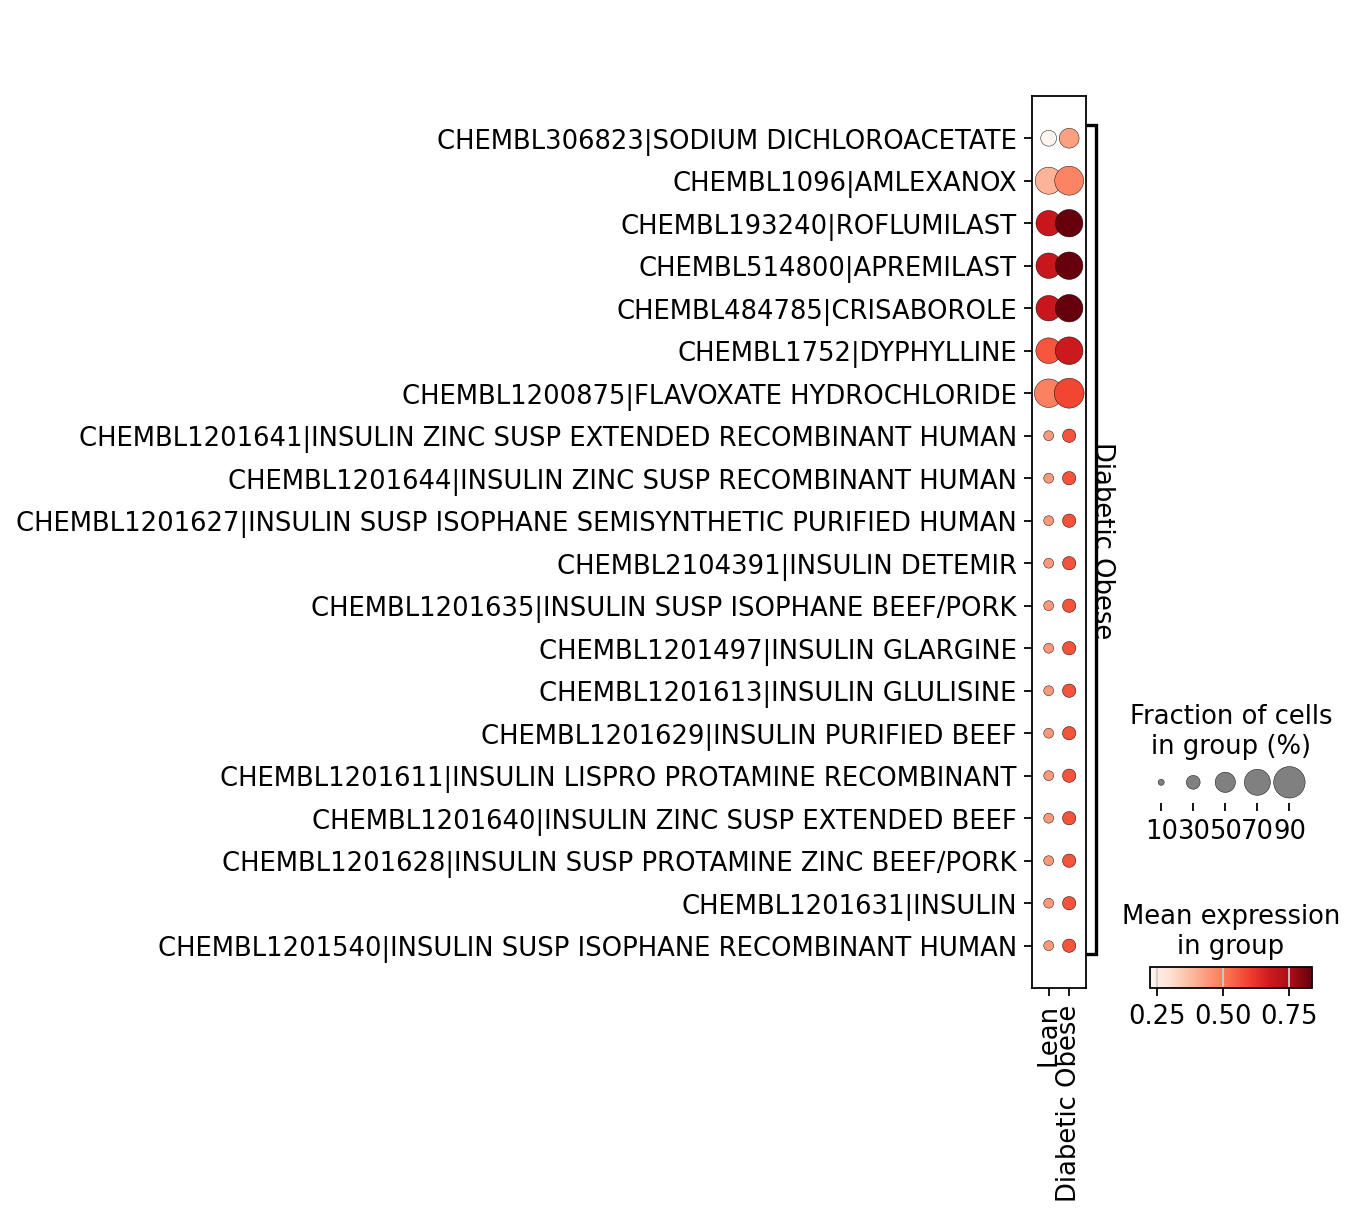

In [34]:
adataC1 = adata[adata.obs['Vascular_labels'] == 'C1'].copy()
adataC1

adataC1_noDiab = adataC1[adataC1.obs['Condition'] != "Diabetic Obese"].copy()
adataC1_noDiab

adataC1_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataC1_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataC1_noDiab

sc.pl.umap(adataC1_noDiab.uns['drug2cell'])

adataC1_noDiab

sc.tl.rank_genes_groups(adataC1_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataC1_noDiab

sc.pl.rank_genes_groups_dotplot(adataC1_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellC1_adataC1_noDiab = adataC1_noDiab.uns['drug2cell']
drug2cellC1_adataC1_noDiab

drug2cellC1_adataC1_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellC1_adataC1_noDiab.uns['rank_genes_groups']

dfC1 = drug2cellC1_adataC1_noDiab.uns['rank_genes_groups']

type(dfC1)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_C1_Lean_vs_Obese.xlsx')


adataC1_noObese = adataC1[adataC1.obs['Condition'] != "Obese"].copy()
adataC1_noObese

adataC1_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataC1_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataC1_noObese

sc.pl.umap(adataC1_noObese.uns['drug2cell'])

adataC1_noObese

sc.tl.rank_genes_groups(adataC1_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataC1_noObese

sc.pl.rank_genes_groups_dotplot(adataC1_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellC1_adataC1_noObese = adataC1_noObese.uns['drug2cell']
drug2cellC1_adataC1_noObese

drug2cellC1_adataC1_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellC1_adataC1_noObese.uns['rank_genes_groups']

dfC1 = drug2cellC1_adataC1_noObese.uns['rank_genes_groups']

type(dfC1)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_C1_Lean_vs_D_Obese.xlsx')

# C2

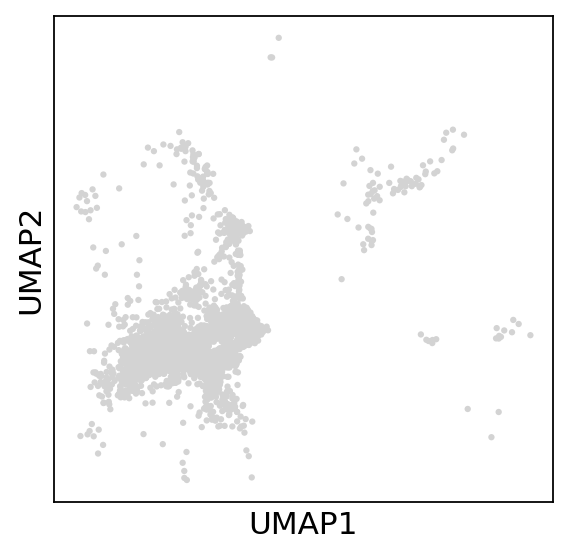

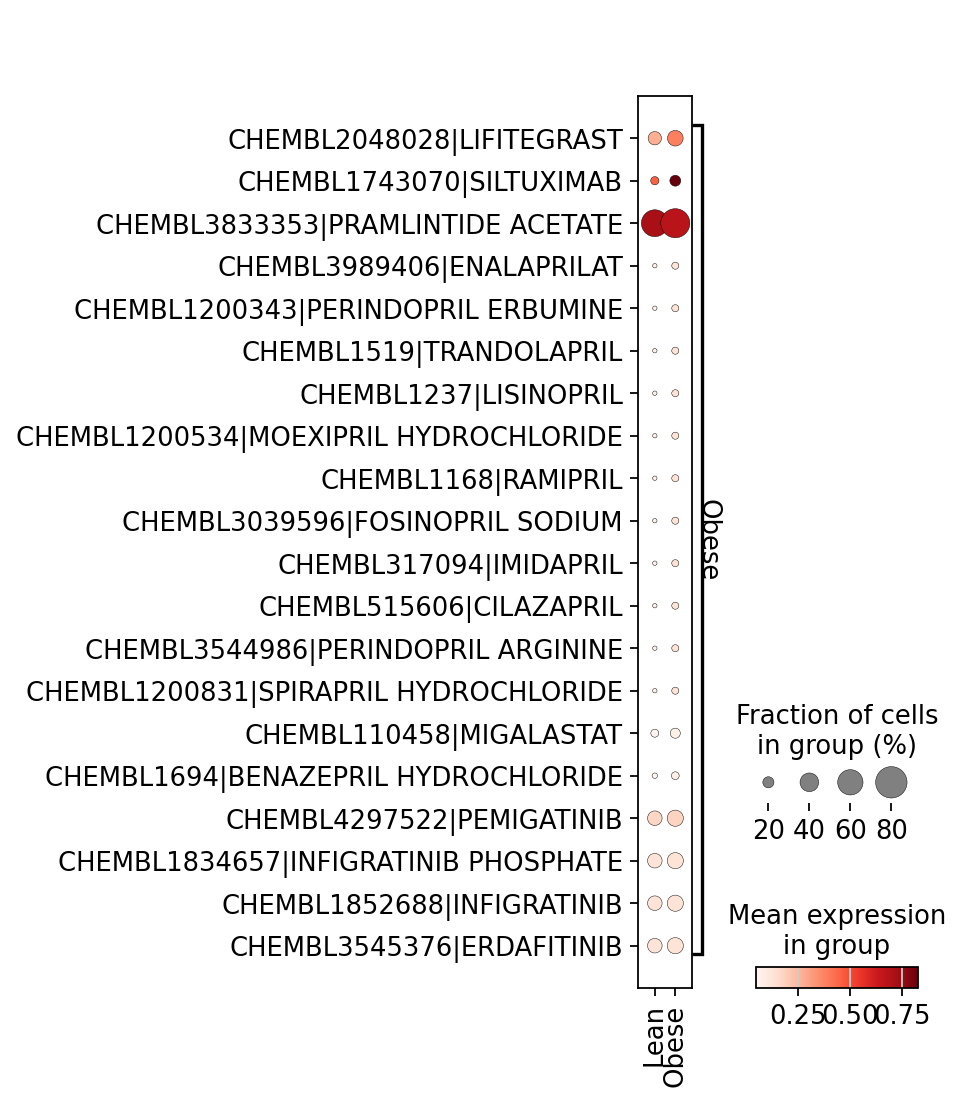

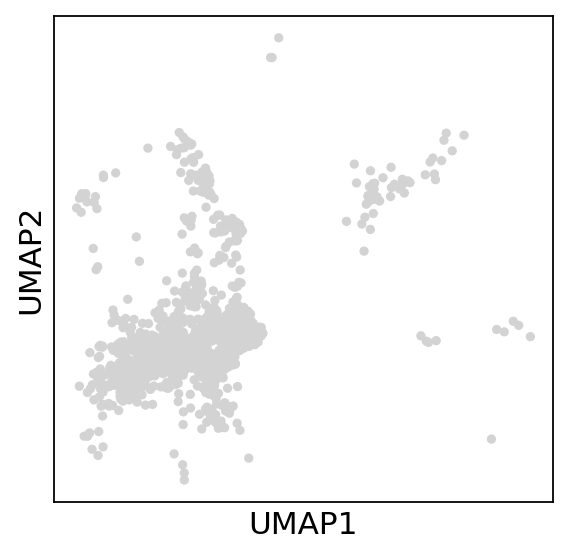

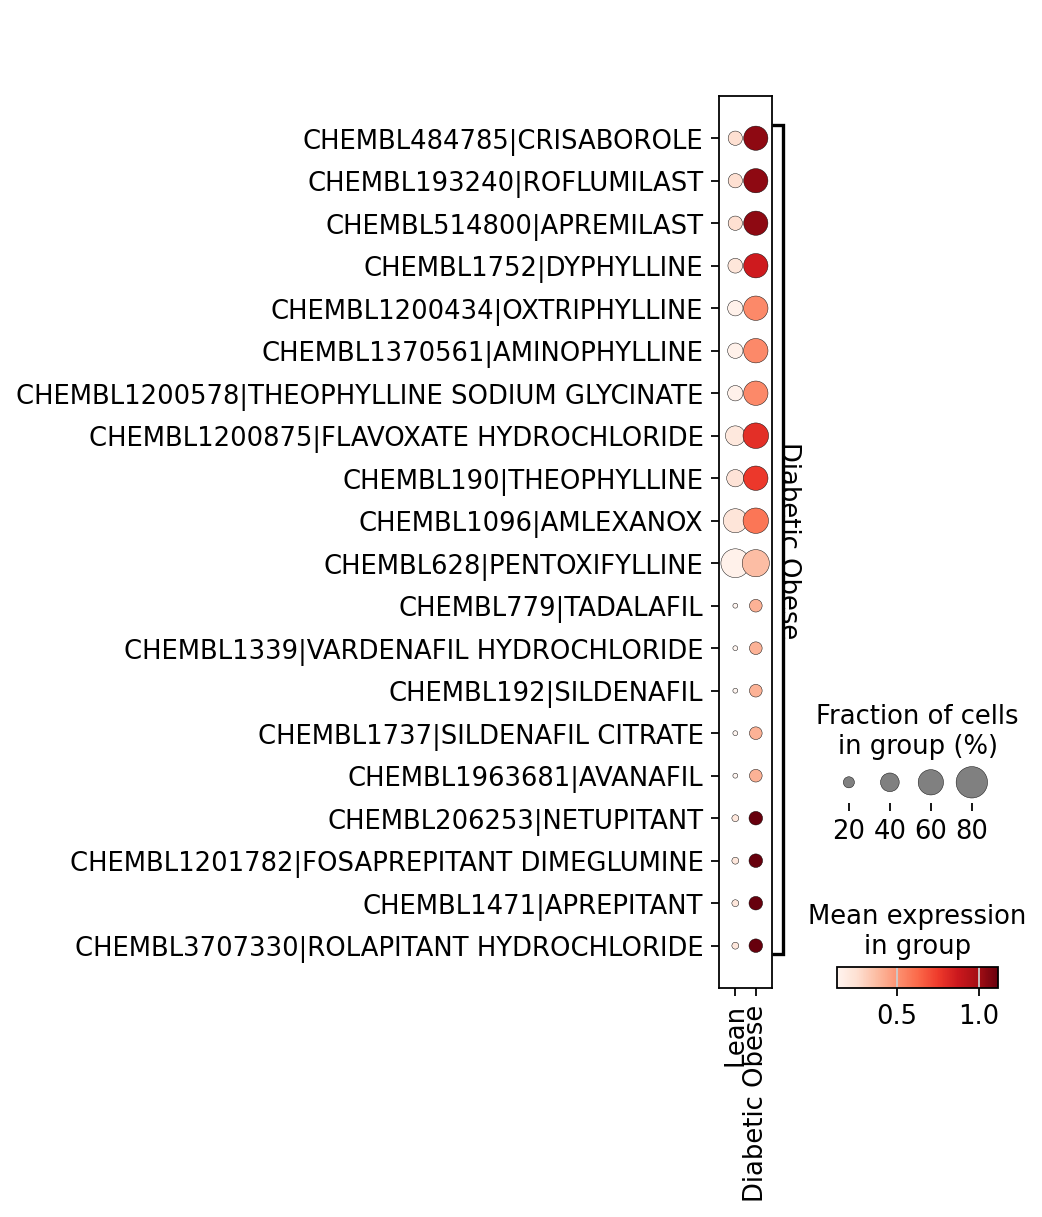

In [35]:
adataC2 = adata[adata.obs['Vascular_labels'] == 'C2'].copy()
adataC2

adataC2_noDiab = adataC2[adataC2.obs['Condition'] != "Diabetic Obese"].copy()
adataC2_noDiab

adataC2_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataC2_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataC2_noDiab

sc.pl.umap(adataC2_noDiab.uns['drug2cell'])

adataC2_noDiab

sc.tl.rank_genes_groups(adataC2_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataC2_noDiab

sc.pl.rank_genes_groups_dotplot(adataC2_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellC2_adataC2_noDiab = adataC2_noDiab.uns['drug2cell']
drug2cellC2_adataC2_noDiab

drug2cellC2_adataC2_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellC2_adataC2_noDiab.uns['rank_genes_groups']

dfC2 = drug2cellC2_adataC2_noDiab.uns['rank_genes_groups']

type(dfC2)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_C2_Lean_vs_Obese.xlsx')


adataC2_noObese = adataC2[adataC2.obs['Condition'] != "Obese"].copy()
adataC2_noObese

adataC2_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataC2_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataC2_noObese

sc.pl.umap(adataC2_noObese.uns['drug2cell'])

adataC2_noObese

sc.tl.rank_genes_groups(adataC2_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataC2_noObese

sc.pl.rank_genes_groups_dotplot(adataC2_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellC2_adataC2_noObese = adataC2_noObese.uns['drug2cell']
drug2cellC2_adataC2_noObese

drug2cellC2_adataC2_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellC2_adataC2_noObese.uns['rank_genes_groups']

dfC2 = drug2cellC2_adataC2_noObese.uns['rank_genes_groups']

type(dfC2)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_C2_Lean_vs_D_Obese.xlsx')


# Art

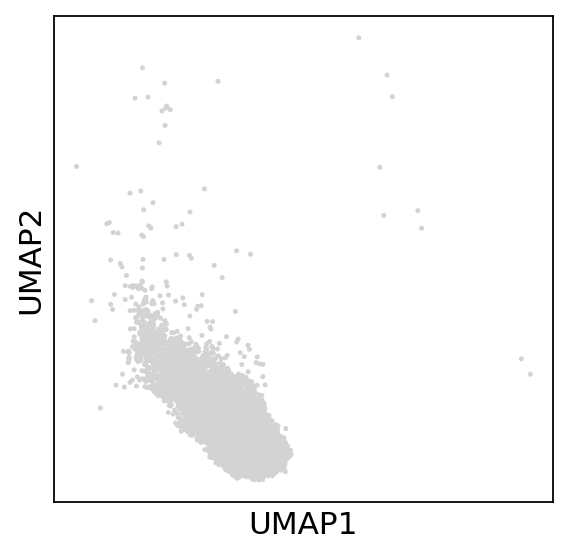

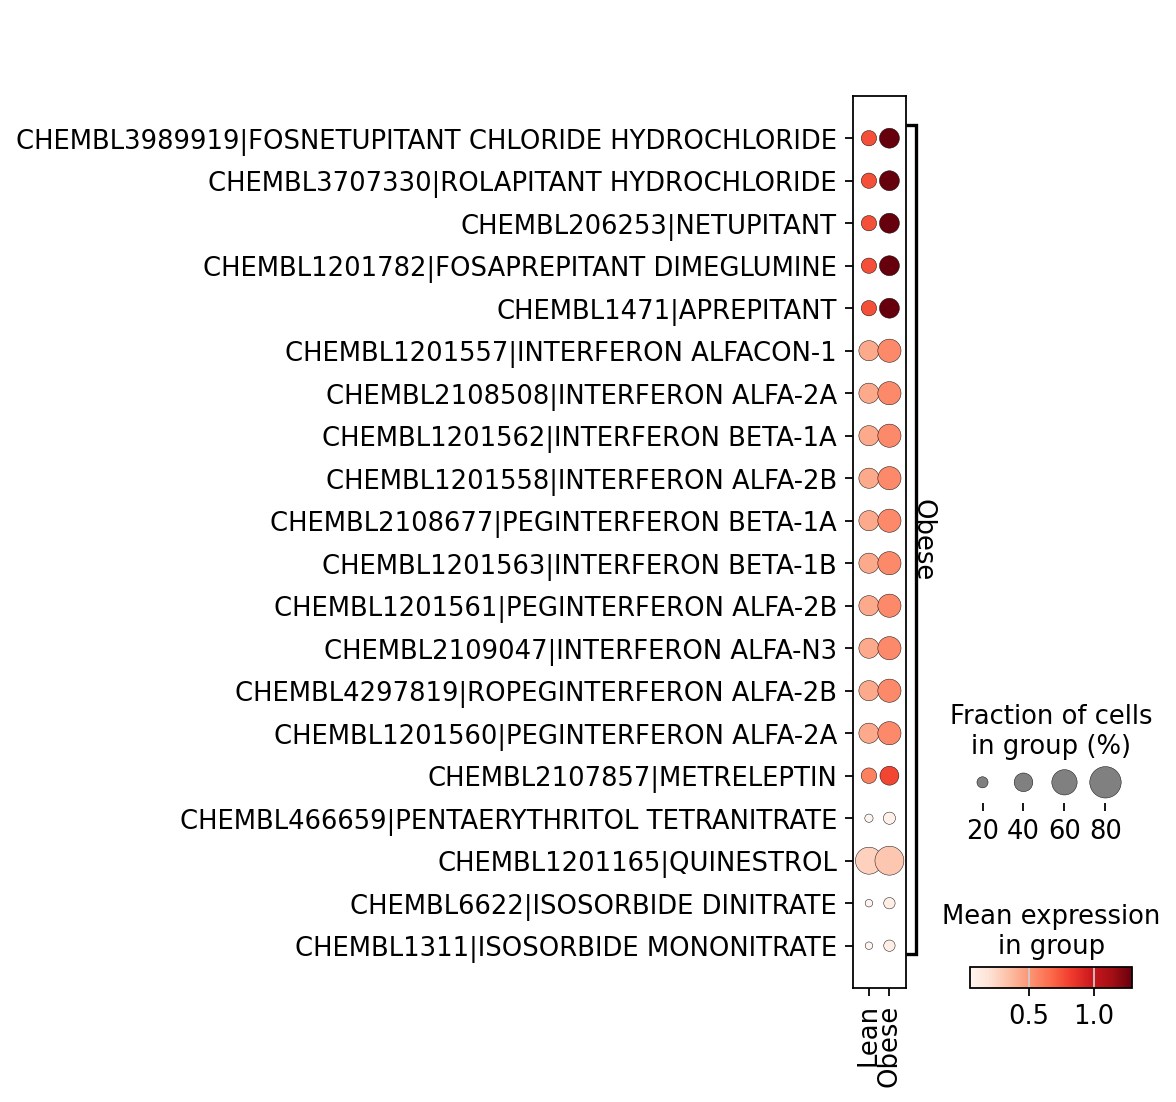

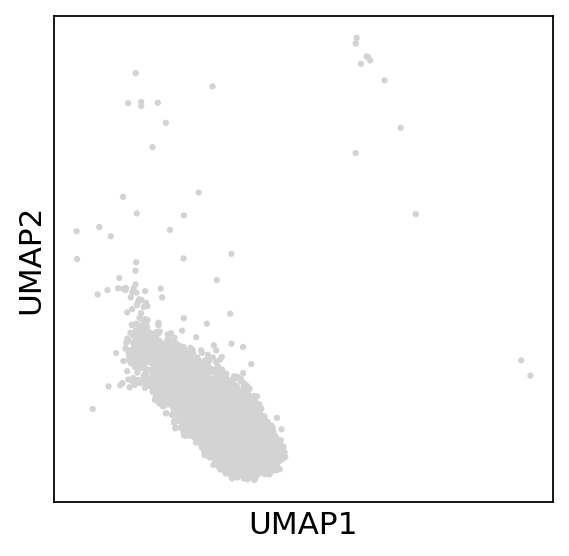

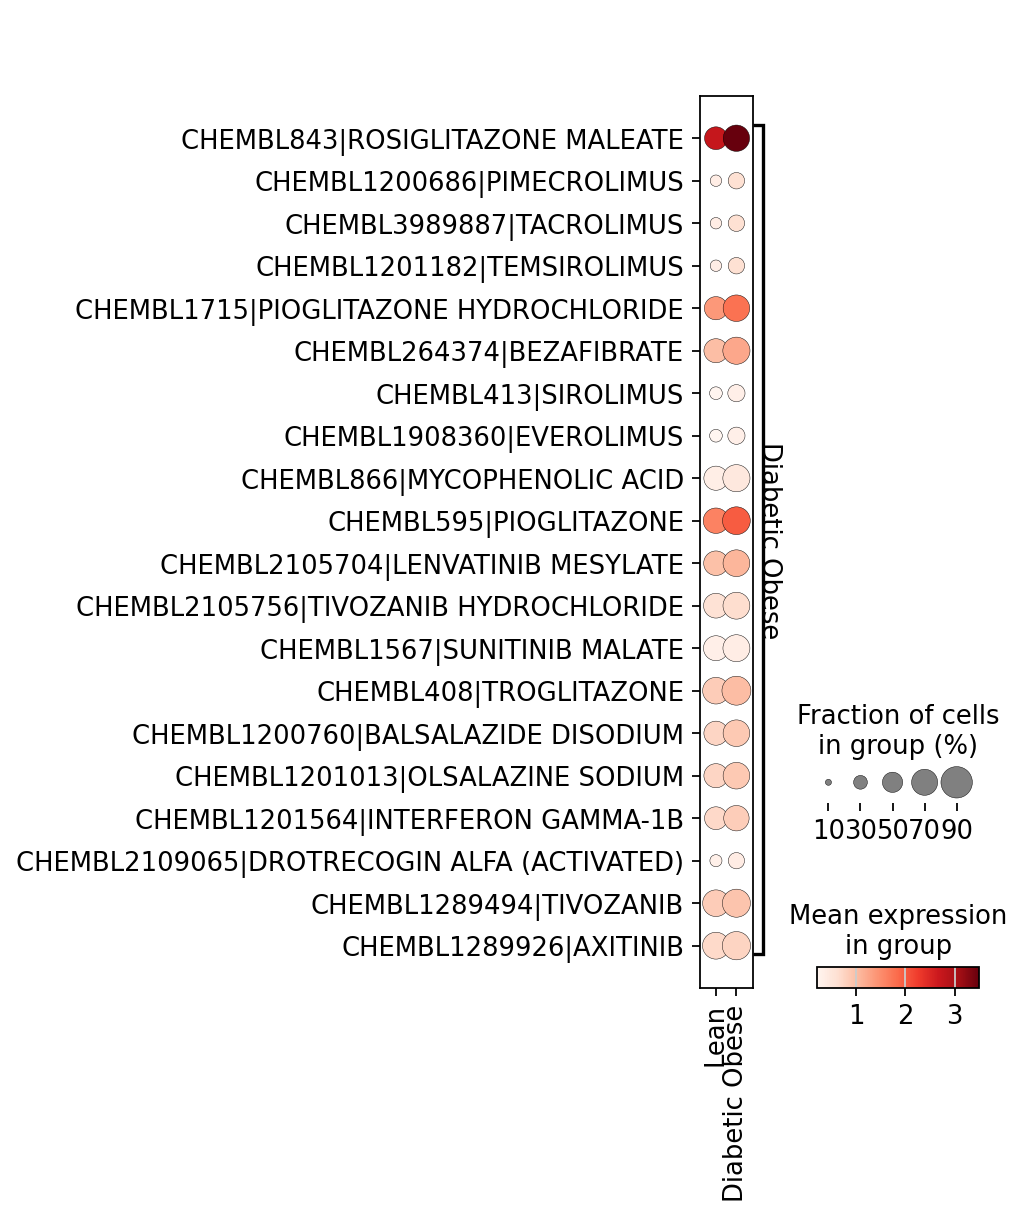

In [36]:
adataArt = adata[adata.obs['Vascular_labels'] == 'Art'].copy()
adataArt

adataArt_noDiab = adataArt[adataArt.obs['Condition'] != "Diabetic Obese"].copy()
adataArt_noDiab

adataArt_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataArt_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataArt_noDiab

sc.pl.umap(adataArt_noDiab.uns['drug2cell'])

adataArt_noDiab

sc.tl.rank_genes_groups(adataArt_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataArt_noDiab

sc.pl.rank_genes_groups_dotplot(adataArt_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellArt_adataArt_noDiab = adataArt_noDiab.uns['drug2cell']
drug2cellArt_adataArt_noDiab

drug2cellArt_adataArt_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellArt_adataArt_noDiab.uns['rank_genes_groups']

dfArt = drug2cellArt_adataArt_noDiab.uns['rank_genes_groups']

type(dfArt)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_Art_Lean_vs_Obese.xlsx')


adataArt_noObese = adataArt[adataArt.obs['Condition'] != "Obese"].copy()
adataArt_noObese

adataArt_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataArt_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataArt_noObese

sc.pl.umap(adataArt_noObese.uns['drug2cell'])

adataArt_noObese

sc.tl.rank_genes_groups(adataArt_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataArt_noObese

sc.pl.rank_genes_groups_dotplot(adataArt_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellArt_adataArt_noObese = adataArt_noObese.uns['drug2cell']
drug2cellArt_adataArt_noObese

drug2cellArt_adataArt_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellArt_adataArt_noObese.uns['rank_genes_groups']

dfArt = drug2cellArt_adataArt_noObese.uns['rank_genes_groups']

type(dfArt)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_Art_Lean_vs_D_Obese.xlsx')


# LECs

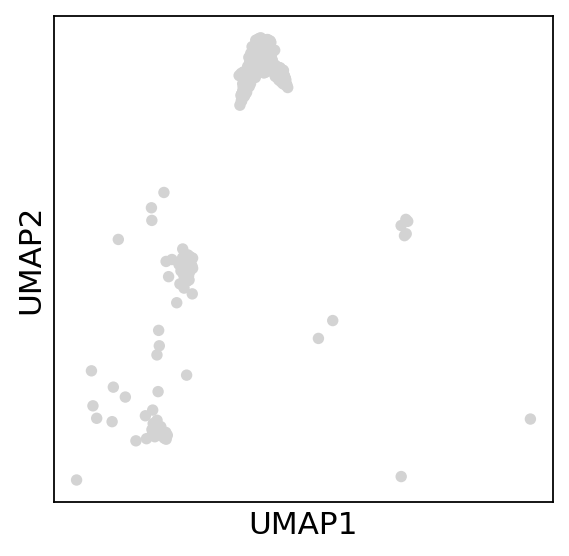

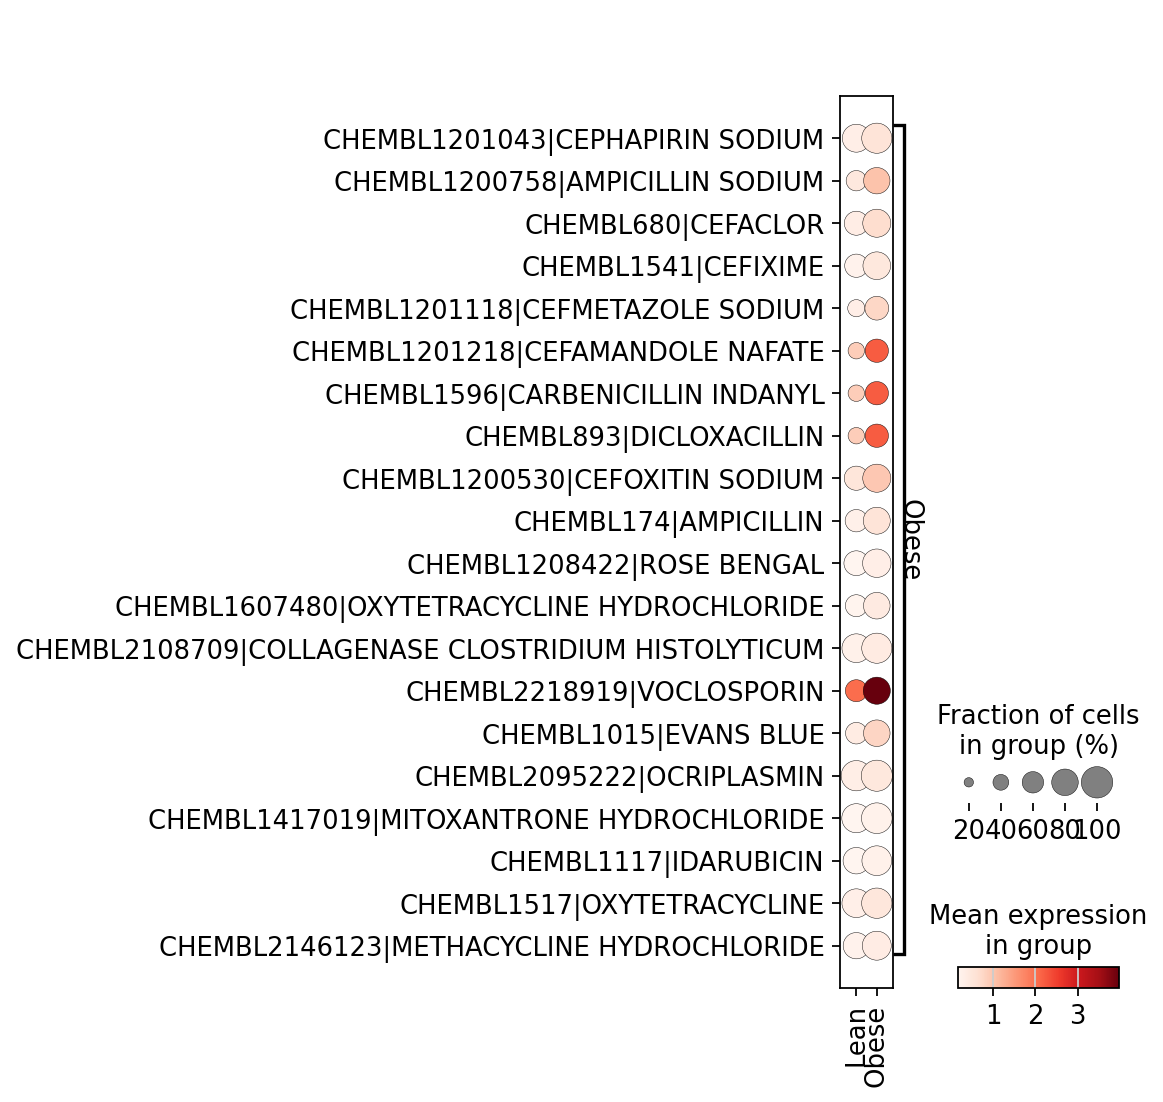

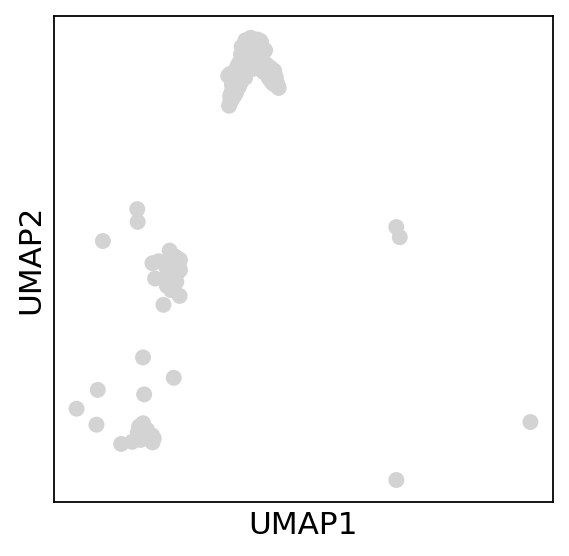

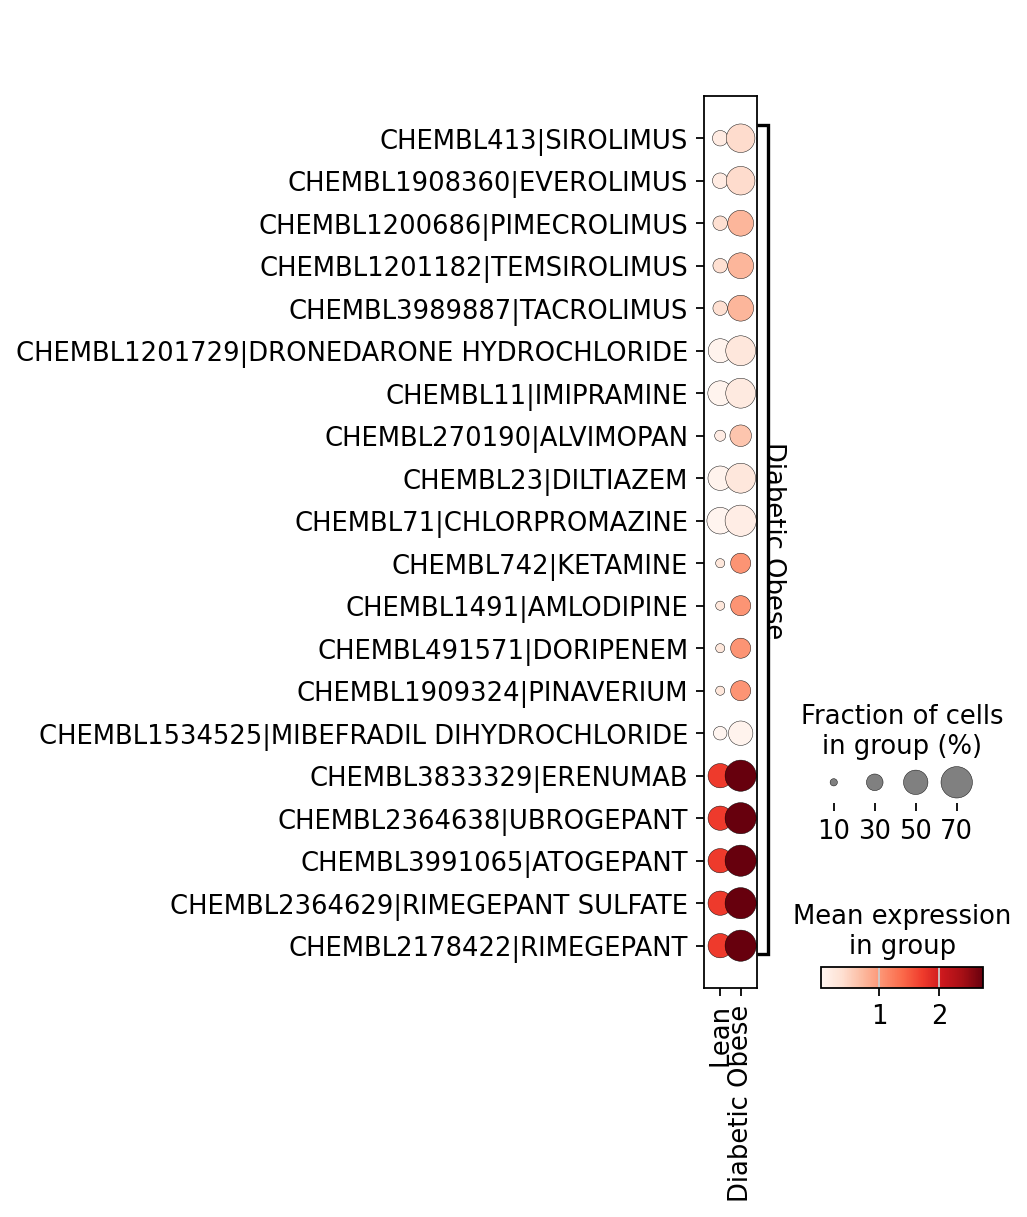

In [37]:
adataLECs = adata[adata.obs['Vascular_labels'] == 'LECs'].copy()
adataLECs

adataLECs_noDiab = adataLECs[adataLECs.obs['Condition'] != "Diabetic Obese"].copy()
adataLECs_noDiab

adataLECs_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataLECs_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataLECs_noDiab

sc.pl.umap(adataLECs_noDiab.uns['drug2cell'])

adataLECs_noDiab

sc.tl.rank_genes_groups(adataLECs_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataLECs_noDiab

sc.pl.rank_genes_groups_dotplot(adataLECs_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellLECs_adataLECs_noDiab = adataLECs_noDiab.uns['drug2cell']
drug2cellLECs_adataLECs_noDiab

drug2cellLECs_adataLECs_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellLECs_adataLECs_noDiab.uns['rank_genes_groups']

dfLECs = drug2cellLECs_adataLECs_noDiab.uns['rank_genes_groups']

type(dfLECs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_LECs_Lean_vs_Obese.xlsx')


adataLECs_noObese = adataLECs[adataLECs.obs['Condition'] != "Obese"].copy()
adataLECs_noObese

adataLECs_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataLECs_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataLECs_noObese

sc.pl.umap(adataLECs_noObese.uns['drug2cell'])

adataLECs_noObese

sc.tl.rank_genes_groups(adataLECs_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataLECs_noObese

sc.pl.rank_genes_groups_dotplot(adataLECs_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellLECs_adataLECs_noObese = adataLECs_noObese.uns['drug2cell']
drug2cellLECs_adataLECs_noObese

drug2cellLECs_adataLECs_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellLECs_adataLECs_noObese.uns['rank_genes_groups']

dfLECs = drug2cellLECs_adataLECs_noObese.uns['rank_genes_groups']

type(dfLECs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_LECs_Lean_vs_D_Obese.xlsx')


# SubECs

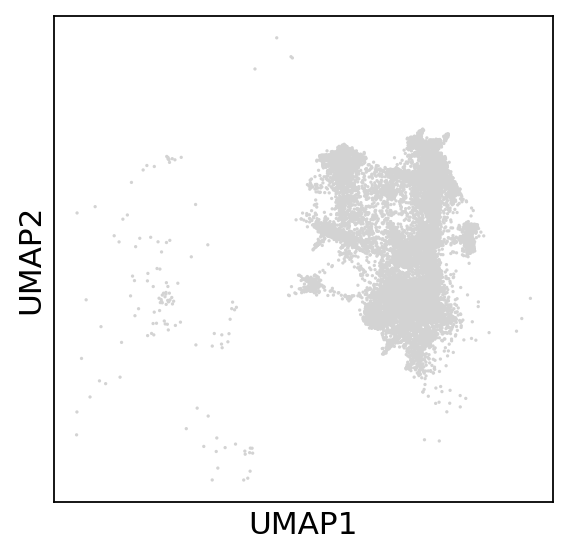

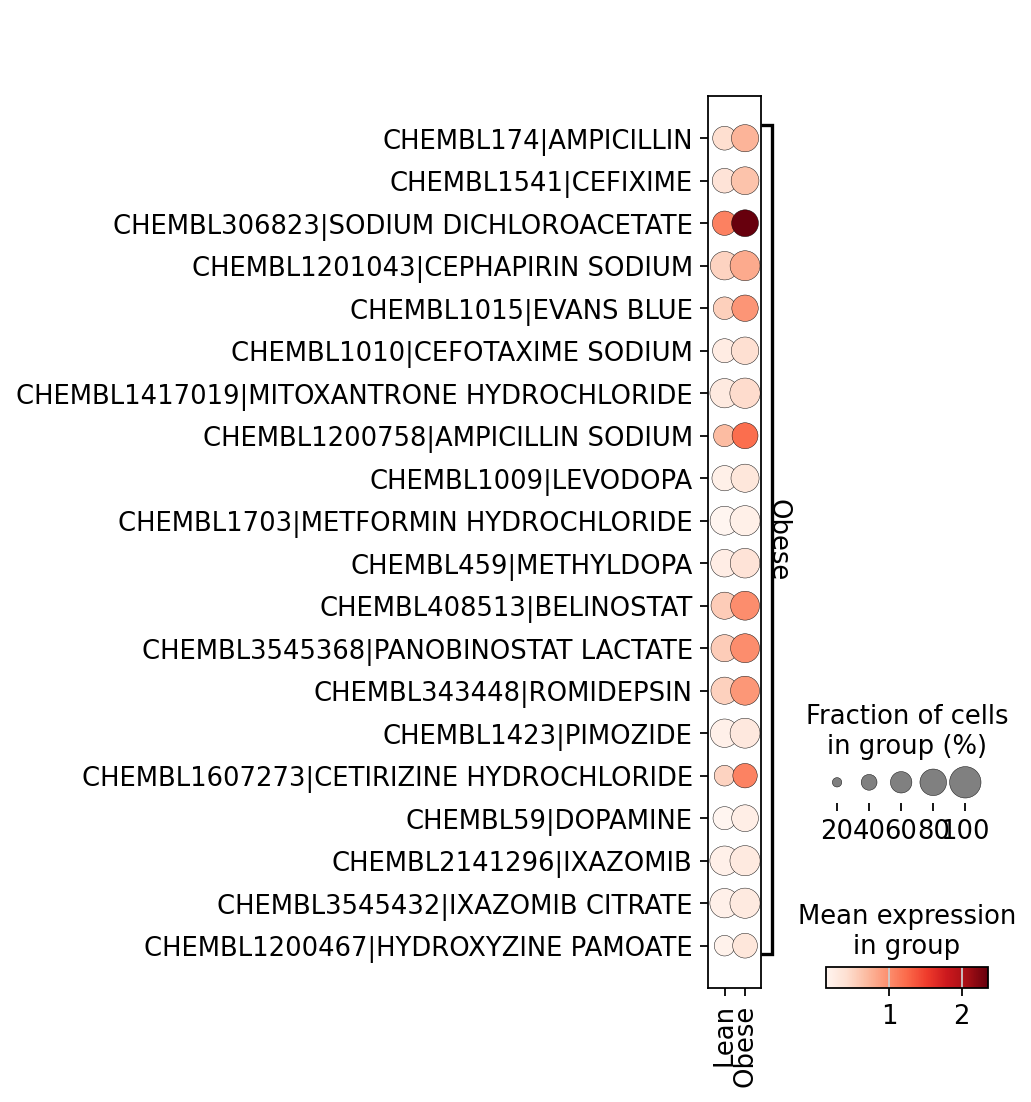

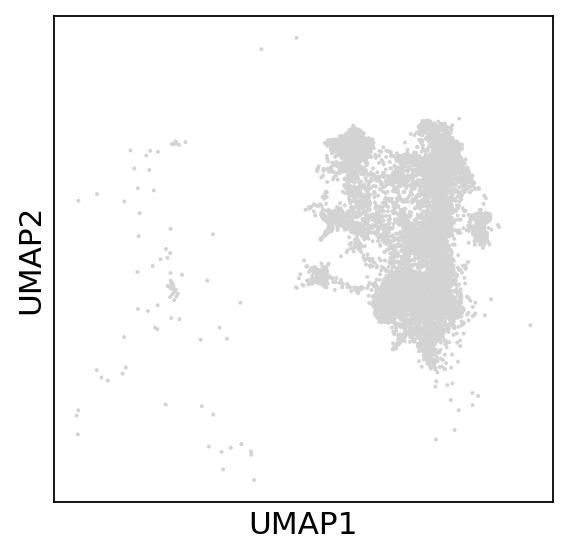

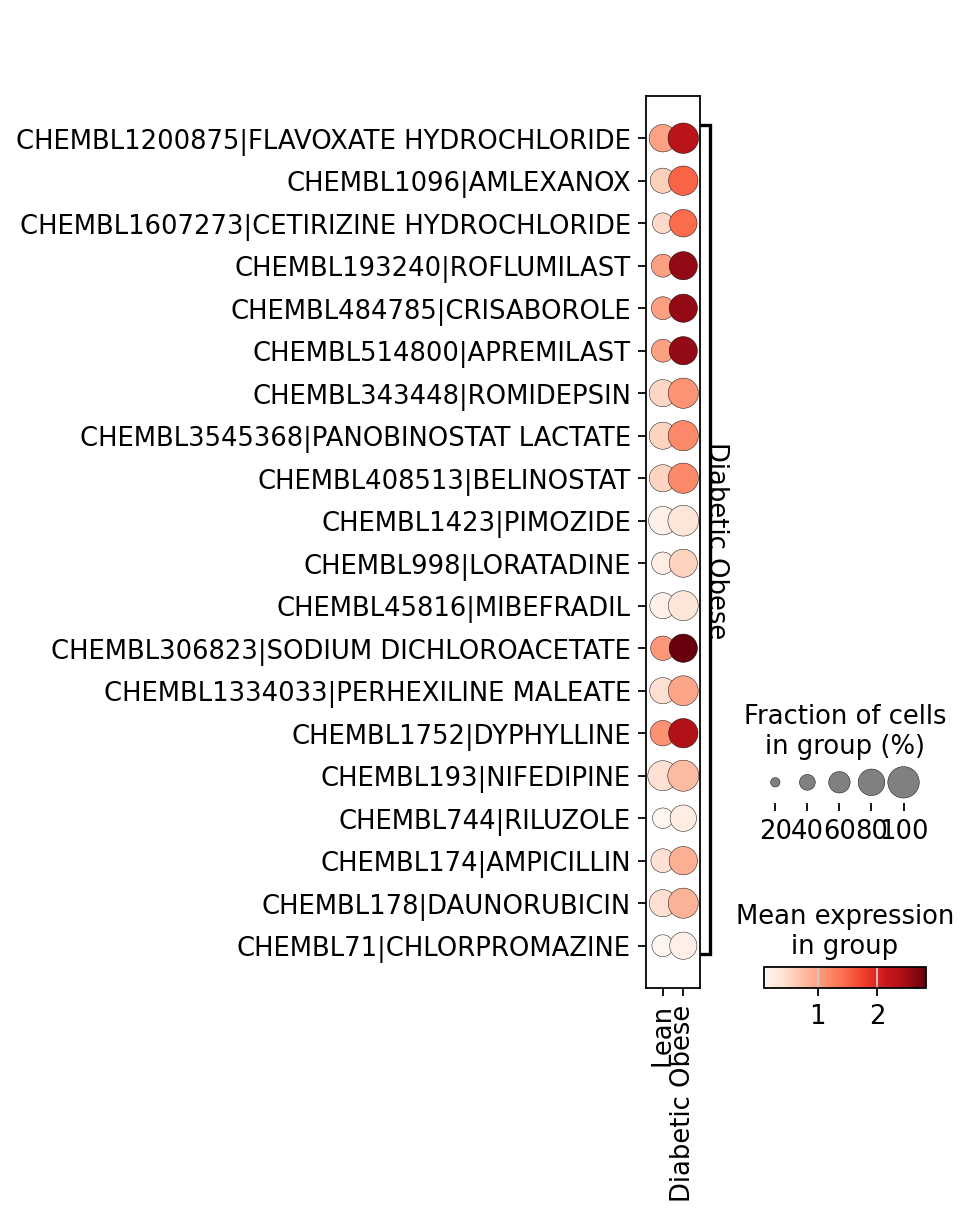

In [38]:
adataSubECs = adata[adata.obs['Vascular_labels'] == 'SubECs'].copy()
adataSubECs

adataSubECs_noDiab = adataSubECs[adataSubECs.obs['Condition'] != "Diabetic Obese"].copy()
adataSubECs_noDiab

adataSubECs_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataSubECs_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataSubECs_noDiab

sc.pl.umap(adataSubECs_noDiab.uns['drug2cell'])

adataSubECs_noDiab

sc.tl.rank_genes_groups(adataSubECs_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataSubECs_noDiab

sc.pl.rank_genes_groups_dotplot(adataSubECs_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellSubECs_adataSubECs_noDiab = adataSubECs_noDiab.uns['drug2cell']
drug2cellSubECs_adataSubECs_noDiab

drug2cellSubECs_adataSubECs_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellSubECs_adataSubECs_noDiab.uns['rank_genes_groups']

dfSubECs = drug2cellSubECs_adataSubECs_noDiab.uns['rank_genes_groups']

type(dfSubECs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_SubECs_Lean_vs_Obese.xlsx')


adataSubECs_noObese = adataSubECs[adataSubECs.obs['Condition'] != "Obese"].copy()
adataSubECs_noObese

adataSubECs_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataSubECs_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataSubECs_noObese

sc.pl.umap(adataSubECs_noObese.uns['drug2cell'])

adataSubECs_noObese

sc.tl.rank_genes_groups(adataSubECs_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataSubECs_noObese

sc.pl.rank_genes_groups_dotplot(adataSubECs_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellSubECs_adataSubECs_noObese = adataSubECs_noObese.uns['drug2cell']
drug2cellSubECs_adataSubECs_noObese

drug2cellSubECs_adataSubECs_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellSubECs_adataSubECs_noObese.uns['rank_genes_groups']

dfSubECs = drug2cellSubECs_adataSubECs_noObese.uns['rank_genes_groups']

type(dfSubECs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_SubECs_Lean_vs_D_Obese.xlsx')


In [39]:
# Pericytes

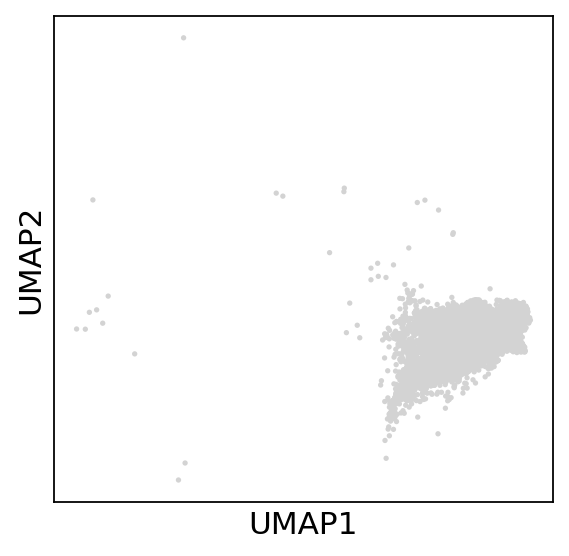

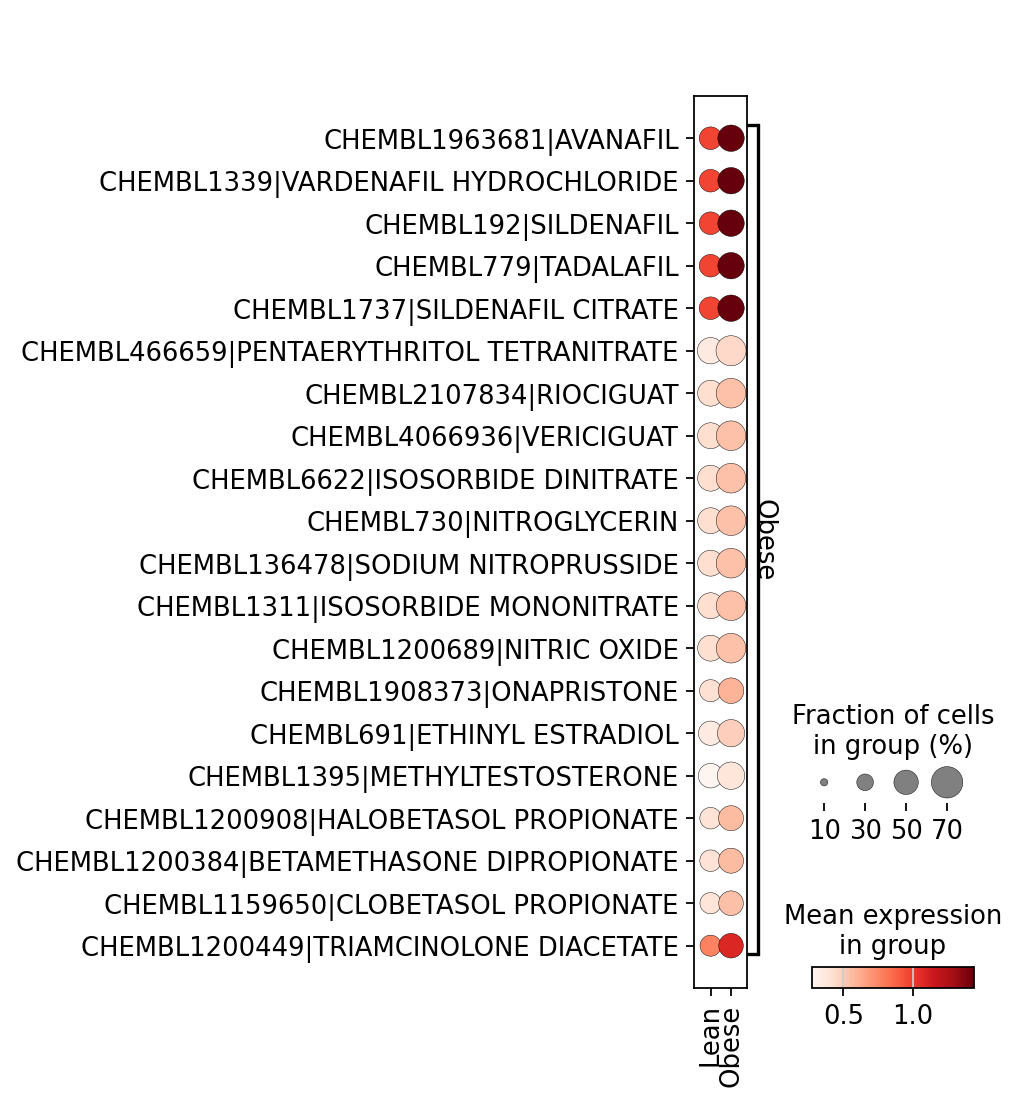

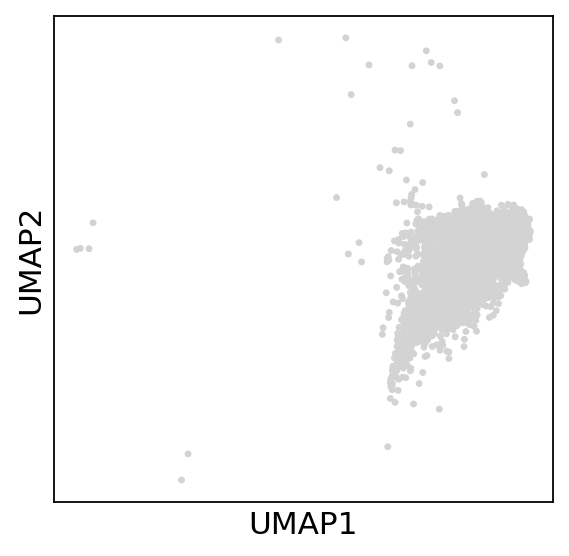

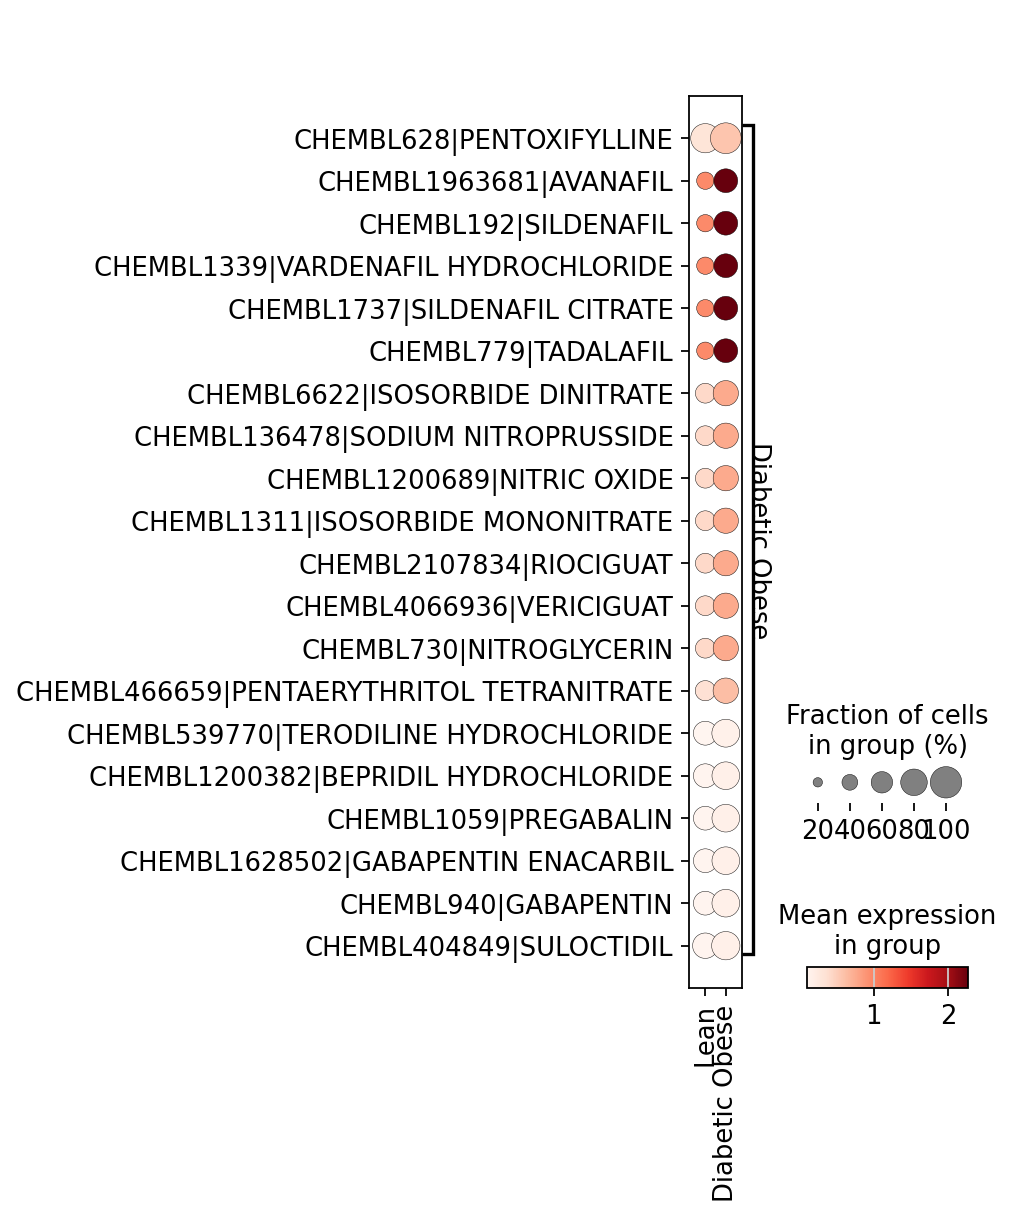

In [40]:
adataPericytes = adata[adata.obs['Vascular_labels'] == 'Pericytes'].copy()
adataPericytes

adataPericytes_noDiab = adataPericytes[adataPericytes.obs['Condition'] != "Diabetic Obese"].copy()
adataPericytes_noDiab

adataPericytes_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataPericytes_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataPericytes_noDiab

sc.pl.umap(adataPericytes_noDiab.uns['drug2cell'])

adataPericytes_noDiab

sc.tl.rank_genes_groups(adataPericytes_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataPericytes_noDiab

sc.pl.rank_genes_groups_dotplot(adataPericytes_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellPericytes_adataPericytes_noDiab = adataPericytes_noDiab.uns['drug2cell']
drug2cellPericytes_adataPericytes_noDiab

drug2cellPericytes_adataPericytes_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellPericytes_adataPericytes_noDiab.uns['rank_genes_groups']

dfPericytes = drug2cellPericytes_adataPericytes_noDiab.uns['rank_genes_groups']

type(dfPericytes)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_Pericytes_Lean_vs_Obese.xlsx')


adataPericytes_noObese = adataPericytes[adataPericytes.obs['Condition'] != "Obese"].copy()
adataPericytes_noObese

adataPericytes_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataPericytes_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataPericytes_noObese

sc.pl.umap(adataPericytes_noObese.uns['drug2cell'])

adataPericytes_noObese

sc.tl.rank_genes_groups(adataPericytes_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataPericytes_noObese

sc.pl.rank_genes_groups_dotplot(adataPericytes_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellPericytes_adataPericytes_noObese = adataPericytes_noObese.uns['drug2cell']
drug2cellPericytes_adataPericytes_noObese

drug2cellPericytes_adataPericytes_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellPericytes_adataPericytes_noObese.uns['rank_genes_groups']

dfPericytes = drug2cellPericytes_adataPericytes_noObese.uns['rank_genes_groups']

type(dfPericytes)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_Pericytes_Lean_vs_D_Obese.xlsx')


In [41]:
# VSMCs

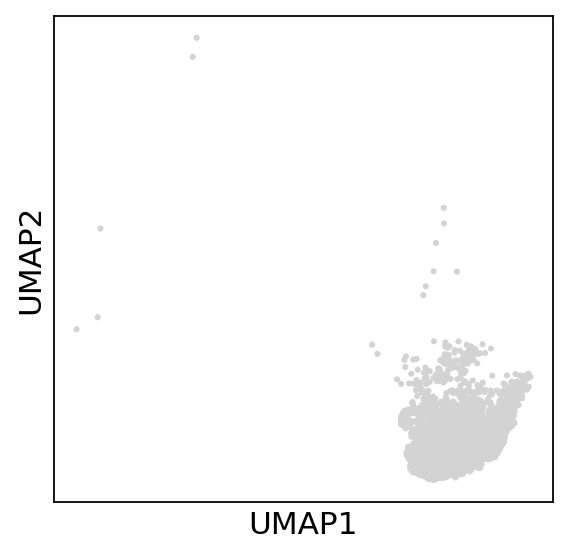

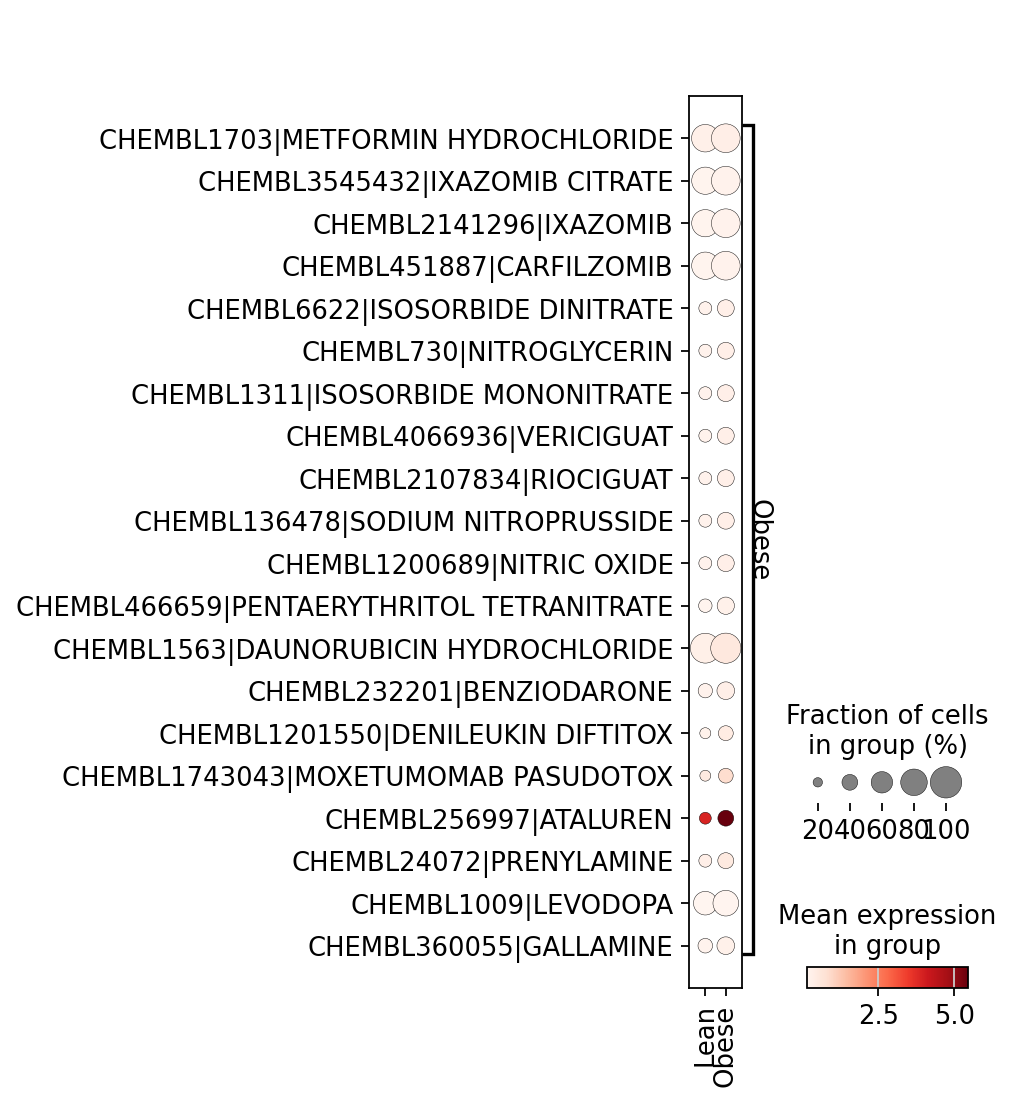

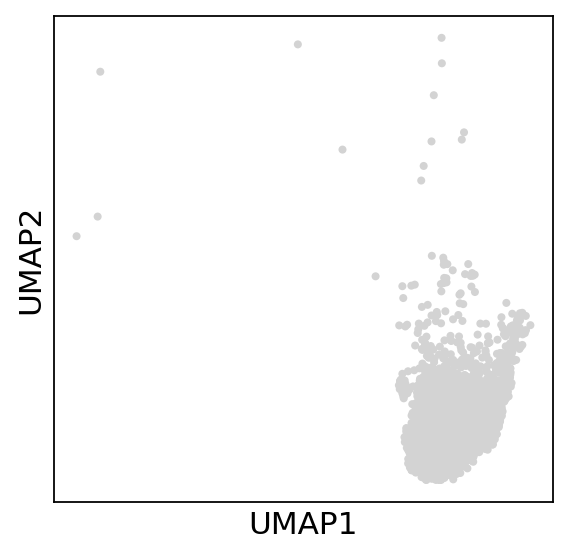

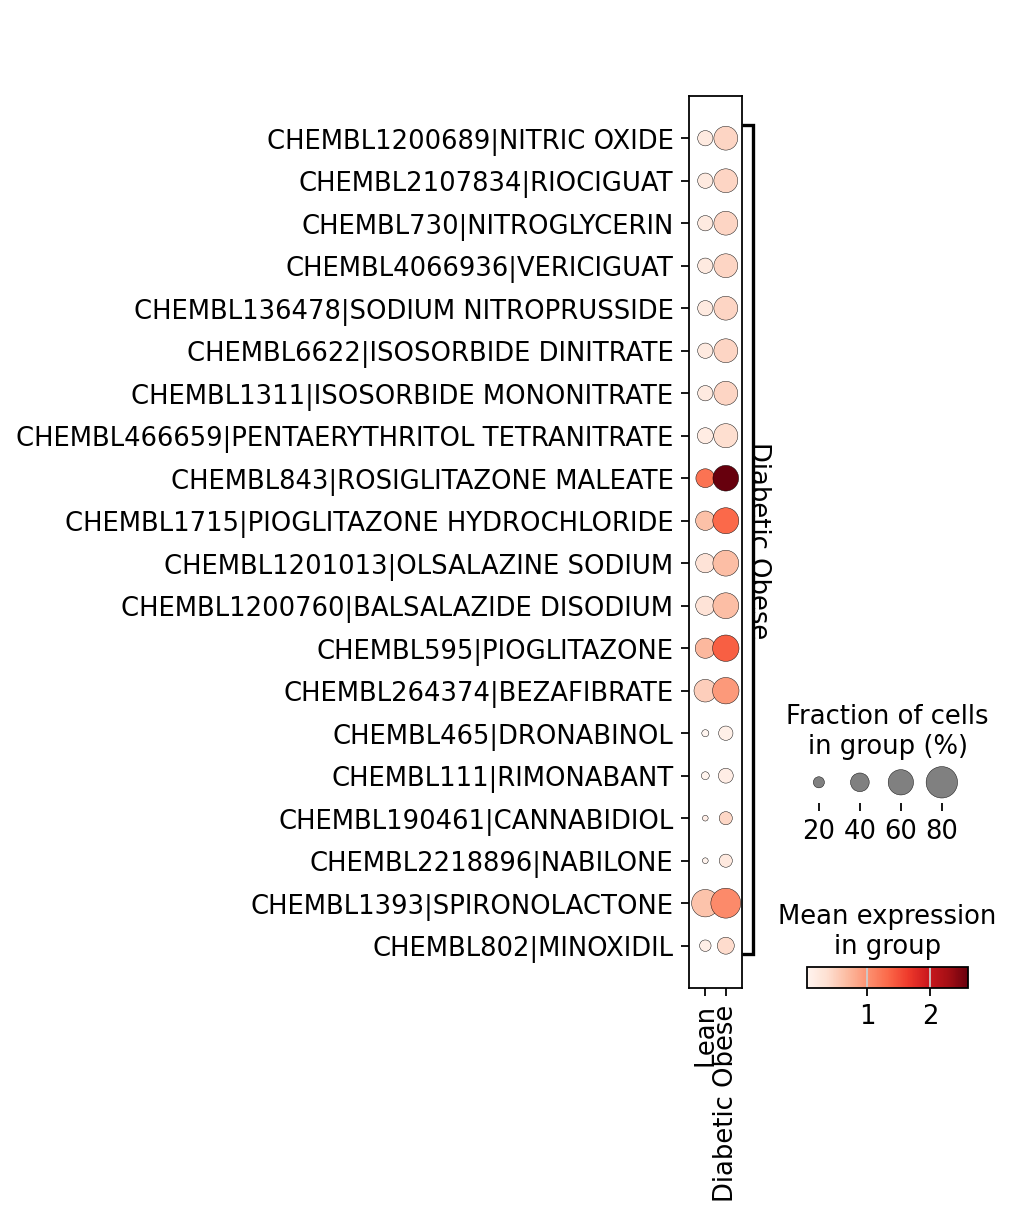

In [42]:
adataVSMCs = adata[adata.obs['Vascular_labels'] == 'VSMCs'].copy()
adataVSMCs

adataVSMCs_noDiab = adataVSMCs[adataVSMCs.obs['Condition'] != "Diabetic Obese"].copy()
adataVSMCs_noDiab

adataVSMCs_noDiab.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataVSMCs_noDiab, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

# adataVSMCs_noDiab

sc.pl.umap(adataVSMCs_noDiab.uns['drug2cell'])

adataVSMCs_noDiab

sc.tl.rank_genes_groups(adataVSMCs_noDiab.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Obese"], 
                        reference="Lean")

adataVSMCs_noDiab

sc.pl.rank_genes_groups_dotplot(adataVSMCs_noDiab.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellVSMCs_adataVSMCs_noDiab = adataVSMCs_noDiab.uns['drug2cell']
drug2cellVSMCs_adataVSMCs_noDiab

drug2cellVSMCs_adataVSMCs_noDiab.uns["rank_genes_groups"]

rank_genes_groups = drug2cellVSMCs_adataVSMCs_noDiab.uns['rank_genes_groups']

dfVSMCs = drug2cellVSMCs_adataVSMCs_noDiab.uns['rank_genes_groups']

type(dfVSMCs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_VSMCs_Lean_vs_Obese.xlsx')


adataVSMCs_noObese = adataVSMCs[adataVSMCs.obs['Condition'] != "Obese"].copy()
adataVSMCs_noObese

adataVSMCs_noObese.obs['Condition']

# Scoring

# The scoring function efficiently computes the mean of the expression of each gene group in each cell. 
# Can be directed to an appropriate location of log-normalised data via a combination of the layer and use_raw arguments.
# By default, the function will load a set of ChEMBL drugs and their targets in a form distributed with the package.

d2c.score(adataVSMCs_noObese, use_raw=True)

# d2c.score() creates a fully fledged AnnData object in adata.uns['drug2cell'] with the gene groups as the feature space. 
# The original object's .obs and .obsm get copied over for ease of downstream use. Let's use the existing UMAP to visualise a drug.

adataVSMCs_noObese

sc.pl.umap(adataVSMCs_noObese.uns['drug2cell'])

adataVSMCs_noObese

sc.tl.rank_genes_groups(adataVSMCs_noObese.uns['drug2cell'], 
                        method="wilcoxon", 
                        groupby="Condition", 
                        groups=["Diabetic Obese"], 
                        reference="Lean")

adataVSMCs_noObese

sc.pl.rank_genes_groups_dotplot(adataVSMCs_noObese.uns['drug2cell'], 
                                swap_axes=True, 
                                dendrogram=False, n_genes=20)

drug2cellVSMCs_adataVSMCs_noObese = adataVSMCs_noObese.uns['drug2cell']
drug2cellVSMCs_adataVSMCs_noObese

drug2cellVSMCs_adataVSMCs_noObese.uns["rank_genes_groups"]

rank_genes_groups = drug2cellVSMCs_adataVSMCs_noObese.uns['rank_genes_groups']

dfVSMCs = drug2cellVSMCs_adataVSMCs_noObese.uns['rank_genes_groups']

type(dfVSMCs)

import pandas as pd

# Extract names, scores, p-values, adjusted p-values, and log fold changes into separate DataFrames
names_df = pd.DataFrame.from_records(rank_genes_groups['names'], columns=rank_genes_groups['names'].dtype.names)
scores_df = pd.DataFrame.from_records(rank_genes_groups['scores'], columns=rank_genes_groups['scores'].dtype.names)
pvals_df = pd.DataFrame.from_records(rank_genes_groups['pvals'], columns=rank_genes_groups['pvals'].dtype.names)
pvals_adj_df = pd.DataFrame.from_records(rank_genes_groups['pvals_adj'], columns=rank_genes_groups['pvals_adj'].dtype.names)
logfoldchanges_df = pd.DataFrame.from_records(rank_genes_groups['logfoldchanges'], columns=rank_genes_groups['logfoldchanges'].dtype.names)

# Add suffixes to column names for clarity
names_df = names_df.add_suffix('_name')
scores_df = scores_df.add_suffix('_score')
pvals_df = pvals_df.add_suffix('_pval')
pvals_adj_df = pvals_adj_df.add_suffix('_pval_adj')
logfoldchanges_df = logfoldchanges_df.add_suffix('_logfoldchange')

# Combine all DataFrames along the columns (axis=1)
combined_df = pd.concat([names_df, scores_df, pvals_df, pvals_adj_df, logfoldchanges_df], axis=1)

# Rename specific columns, if needed (e.g., rename one of the names to "Drug")
combined_df = combined_df.rename(columns={"Diabetic Obese_name": "Drug"})

# Preview the first few rows of the DataFrame
combined_df.head()

# Export the combined DataFrame to Excel
combined_df.to_excel('/home/mhassan/R_Projects/scAtlas/Revision/drug2cell/wilcox/drug2cell_uns_VSMCs_Lean_vs_D_Obese.xlsx')


# Overrepresentation

In [48]:
adataC1_noDiab.uns['drug2cell']

AnnData object with n_obs × n_vars = 9928 × 2388
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'Vascular_labels', 'transferred_labels_from_SubECs'
    var: 'genes', 'all_genes'
    uns: 'rank_genes_groups'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [71]:
sc.tl.rank_genes_groups(adataC1_noDiab, 
                        method="wilcoxon", 
                        groupby="Condition", groups=['Obese'], reference="Lean")

In [72]:
overrepresentation_C1 = d2c.hypergeometric(adataC1_noDiab)

In [73]:
overrepresentation_C1

{'Obese':                                              intersection  gene_group  \
 CHEMBL932|DIPYRIDAMOLE                                 10          49   
 CHEMBL1983268|ENTRECTINIB                              10          55   
 CHEMBL34259|METHOTREXATE                                5          16   
 CHEMBL1624|LEVOTHYROXINE                                3           4   
 CHEMBL608533|MIDOSTAURIN                                5          17   
 ...                                                   ...         ...   
 CHEMBL1562610|MECLOFENAMATE SODIUM                      0           5   
 CHEMBL1200467|HYDROXYZINE PAMOATE                       1           9   
 CHEMBL454|BUTALBITAL                                    0          16   
 CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE             0           2   
 CHEMBL1615779|IOBENGUANE I 131                          0           1   
 
                                              markers  universe         pvals  \
 CHEMBL932|DIPYRIDAM

/home/mhassan/miniconda3/envs/drug2cell/lib/python3.12/site-packages/drug2cell/util.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


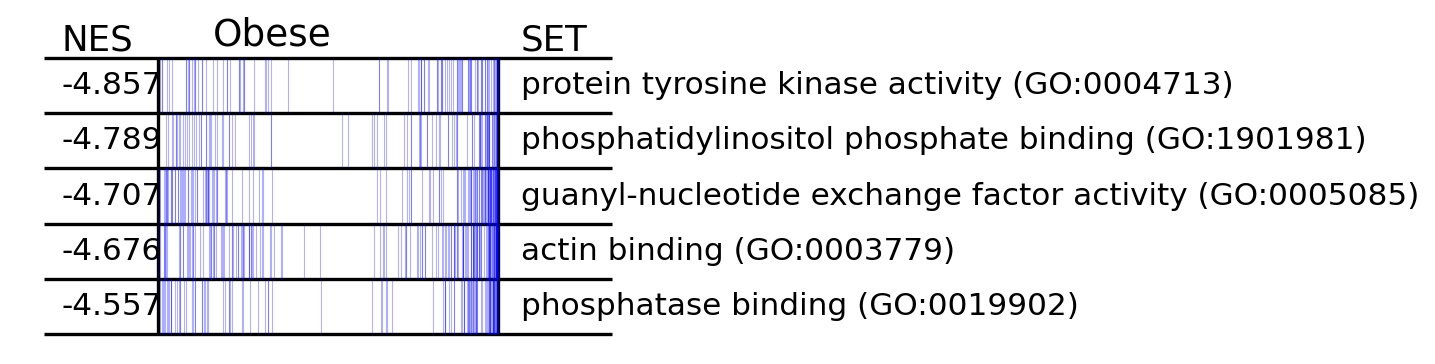

In [74]:
targets = blitz.enrichr.get_library("GO_Molecular_Function_2021")
enrichment, plot_gsea_args = d2c.gsea(adataC1_noDiab, targets=targets)
d2c.util.plot_gsea(enrichment, n=5, **plot_gsea_args)

/tmp/ipykernel_1783117/3109194102.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


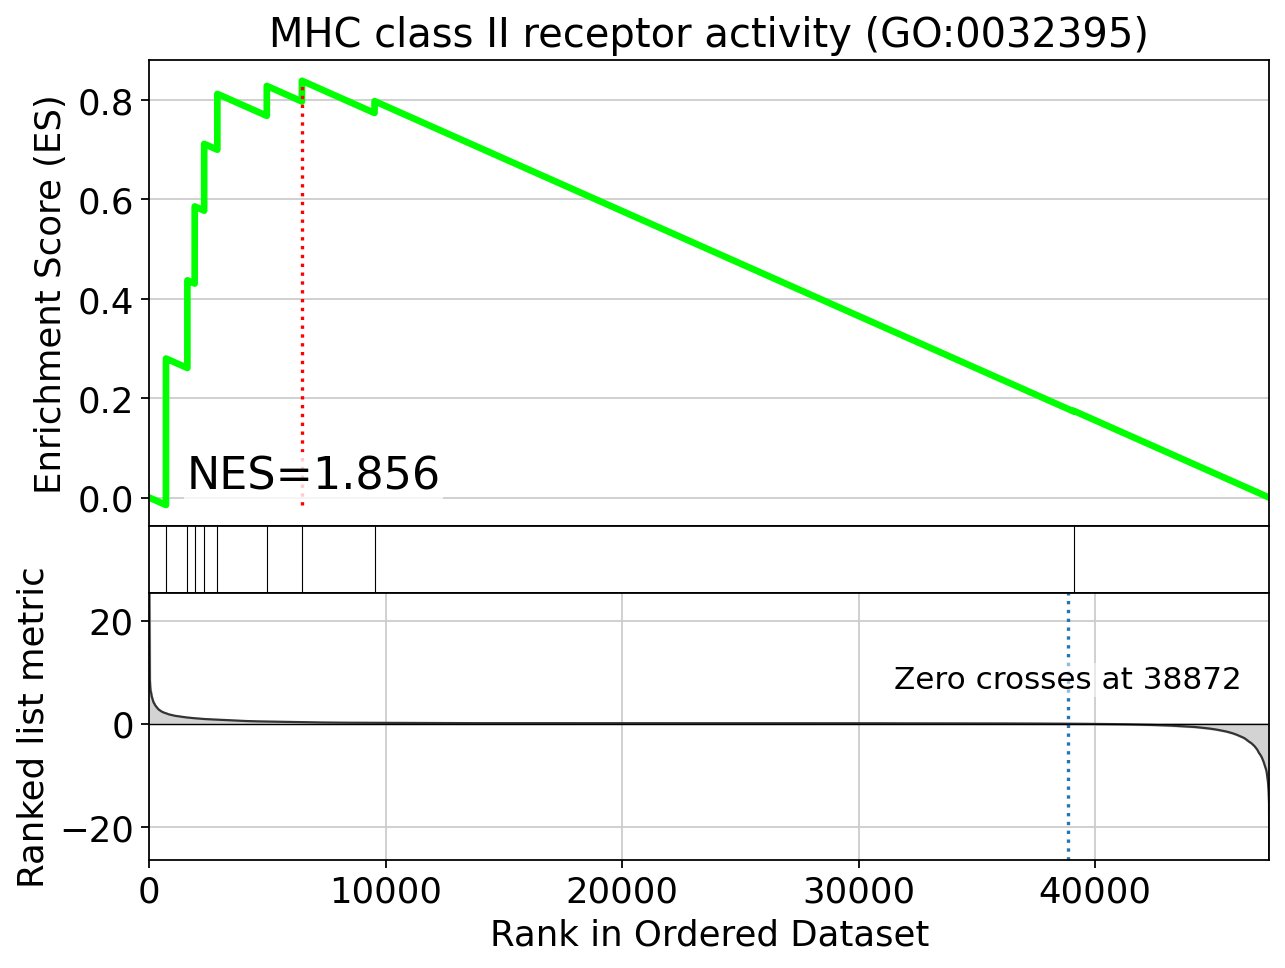

In [76]:
fig = blitz.plot.running_sum(
    signature = plot_gsea_args['scores']['Obese'],
    library = plot_gsea_args['targets'],
    result = enrichment['Obese'],
    geneset = "MHC class II receptor activity (GO:0032395)",
    interactive_plot = True
)
fig.show()

In [77]:
cpdb_dict = pd.read_pickle('/home/mhassan/drug2cell/drug2cell/cpdb_dict.pkl')

In [80]:
cpdb_dict

{'path:hsa00250: Alanine, aspartate and glutamate metabolism - Homo sapiens (human)': ['NIT2',
  'ASNS',
  'GLUL',
  'ABAT',
  'ADSL',
  'GLS',
  'ASS1',
  'GAD1',
  'GAD2',
  'CAD',
  'ASPA',
  'GOT2',
  'ASRGL1',
  'GOT1',
  'ASL',
  'RIMKLA',
  'RIMKLB',
  'DDO',
  'GFPT1',
  'GPT',
  'ALDH4A1',
  'AGXT2',
  'NAT8L',
  'IL4I1',
  'GOT1L1',
  'GPT2',
  'AGXT',
  'GLUD2',
  'GLUD1',
  'PPAT',
  'ADSS2',
  'ADSS1',
  'ALDH5A1',
  'GFPT2',
  'FOLH1',
  'CPS1',
  'GLS2'],
 'path:hsa00790: Folate biosynthesis - Homo sapiens (human)': ['PCBD2',
  'MOCOS',
  'PCBD1',
  'MOCS2',
  'MOCS1',
  'DHFR2',
  'PAH',
  'AKR1C3',
  'AKR1B10',
  'SPR',
  'CBR1',
  'DHFR',
  'TH',
  'PTS',
  'GGH',
  'QDPR',
  'TPH1',
  'TPH2',
  'FPGS',
  'AKR1B1',
  'GPHN',
  'ALPP',
  'GCH1',
  'ALPG',
  'ALPI',
  'ALPL'],
 'path:hsa04610: Complement and coagulation cascades - Homo sapiens (human)': ['F8',
  'KNG1',
  'F11',
  'CD55',
  'C1QC',
  'VSIG4',
  'CD59',
  'PROS1',
  'C1QB',
  'C8A',
  'C8B',
  'SERPING1'

In [84]:
import numpy as np
# Example of padding shorter arrays
max_length = max(len(v) for v in cpdb_dict.values())
for key in cpdb_dict:
    while len(cpdb_dict[key]) < max_length:
        cpdb_dict[key].append(np.nan)  # Pad with NaN

df = pd.DataFrame(cpdb_dict)

In [86]:
df.to_excel('cpdb_dict.xlsx')

In [87]:
drug_target_dicts = pd.read_pickle('/home/mhassan/drug2cell/drug2cell/drug-target_dicts.pkl')

In [88]:
drug_target_dicts

{'G': {'CHEMBL1162|NORETHINDRONE': ['PGR'],
  'CHEMBL1201464|CHORIOGONADOTROPIN ALFA': ['LHCGR'],
  'CHEMBL1018|DIENESTROL': ['ESR1', 'ADRB2', 'GMNN', 'ALOX15B', 'ALOX15'],
  'CHEMBL1231|OXYBUTYNIN': ['CHRM3', 'CHRM2'],
  'CHEMBL1201692|FOLLITROPIN ALFA': ['FSHR'],
  'CHEMBL2105618|ALLYLESTRENOL': ['ESR2', 'PGR', 'ESR1'],
  'CHEMBL130|CHLORAMPHENICOL': ['TDP1', 'ALDH1A1'],
  'CHEMBL104|CLOTRIMAZOLE': ['KDM4A',
   'LMNA',
   'HSP90AA1',
   'KCNH2',
   'ATXN2',
   'CBX1',
   'GLP1R',
   'TP53',
   'CYP2C19',
   'CYP3A4',
   'RAPGEF4',
   'MAPK1',
   'HIF1A',
   'CYP2D6',
   'BAZ2B',
   'ADRB2',
   'GMNN',
   'TDP1',
   'CYP2C9',
   'NPSR1',
   'THPO',
   'CACNA1C',
   'TSHR',
   'CYP1A2',
   'AVPR2'],
  'CHEMBL110691|CHLORMADINONE ACETATE': ['TDP1', 'PGR', 'THRB', 'NPSR1'],
  'CHEMBL2107067|TESTOSTERONE UNDECANOATE': ['AR'],
  'CHEMBL1533|DESOGESTREL': ['PGR', 'GMNN'],
  'CHEMBL1509|DROSPIRENONE': ['TDP1', 'PGR', 'NR3C2'],
  'CHEMBL1276308|MIFEPRISTONE': ['EHMT2',
   'BAZ2B',
   'CBX1',


In [89]:
import numpy as np
# Example of padding shorter arrays
max_length = max(len(v) for v in drug_target_dicts.values())
for key in drug_target_dicts:
    while len(drug_target_dicts[key]) < max_length:
        drug_target_dicts[key].append(np.nan)  # Pad with NaN

AttributeError: 'dict' object has no attribute 'append'

In [90]:
df = pd.DataFrame(drug_target_dicts)

In [91]:
df

G  \
CHEMBL1162|NORETHINDRONE                                              [PGR]   
CHEMBL1201464|CHORIOGONADOTROPIN ALFA                               [LHCGR]   
CHEMBL1018|DIENESTROL                  [ESR1, ADRB2, GMNN, ALOX15B, ALOX15]   
CHEMBL1231|OXYBUTYNIN                                        [CHRM3, CHRM2]   
CHEMBL1201692|FOLLITROPIN ALFA                                       [FSHR]   
...                                                                     ...   
CHEMBL65794|CEFPIROME                                                   NaN   
CHEMBL1596|CARBENICILLIN INDANYL                                        NaN   
CHEMBL4297711|BULEVIRTIDE                                               NaN   
CHEMBL491571|DORIPENEM                                                  NaN   
CHEMBL1208|CINOXACIN                                                    NaN   

                                         A    C    N    S    D    L  \
CHEMBL1162|NORETHINDRONE               NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1201464|CHORIOGONADOTROPIN ALFA  NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1018|DIENESTROL                  NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1231|OXYBUTYNIN                  NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1201692|FOLLITROPIN ALFA         NaN  NaN  NaN  NaN  NaN  NaN   
...                                    ...  ...  ...  ...  ...  ...   
CHEMBL65794|CEFPIROME                  NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1596|CARBENICILLIN INDANYL       NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL4297711|BULEVIRTIDE              NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL491571|DORIPENEM                 NaN  NaN  NaN  NaN  NaN  NaN   
CHEMBL1208|CINOXACIN                   NaN  NaN  NaN  NaN  NaN  NaN   

                                      No-category    R    M  ...  H03  B03  \
CHEMBL1162|NORETHINDRONE                      NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1201464|CHORIOGONADOTROPIN ALFA         NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1018|DIENESTROL                         NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1231|OXYBUTYNIN                         NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1201692|FOLLITROPIN ALFA                NaN  NaN  NaN  ...  NaN  NaN   
...                                           ...  ...  ...  ...  ...  ...   
CHEMBL65794|CEFPIROME                         NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1596|CARBENICILLIN INDANYL              NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL4297711|BULEVIRTIDE                     NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL491571|DORIPENEM                        NaN  NaN  NaN  ...  NaN  NaN   
CHEMBL1208|CINOXACIN                          NaN  NaN  NaN  ...  NaN  NaN   

                                       A14  A09  R07  V08  D03  M09  V10  V09  
CHEMBL1162|NORETHINDRONE               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1201464|CHORIOGONADOTROPIN ALFA  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1018|DIENESTROL                  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1231|OXYBUTYNIN                  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1201692|FOLLITROPIN ALFA         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                                    ...  ...  ...  ...  ...  ...  ...  ...  
CHEMBL65794|CEFPIROME                  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1596|CARBENICILLIN INDANYL       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL4297711|BULEVIRTIDE              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL491571|DORIPENEM                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
CHEMBL1208|CINOXACIN                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2397 rows x 100 columns]

In [94]:
import session_info

In [96]:
session_info.show()

In [97]:
pip freeze | grep drug2cell

drug2cell==0.1.1
Note: you may need to restart the kernel to use updated packages.
